In [ ]:
!nvidia-smi

Wed Oct  9 10:53:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics==8.0.196

  Using cached ultralytics-8.0.196-py3-none-any.whl.metadata (31 kB)
Using cached ultralytics-8.0.196-py3-none-any.whl (631 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.8
    Uninstalling ultralytics-8.3.8:
      Successfully uninstalled ultralytics-8.3.8


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.26.4>=1.22.2
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 10.4.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.4.1+cu121>=1.8.0
torchvision         ✅ 0.19.1+cu121>=0.9.0
tqdm                ✅ 4.66.5>=4.64.0
pandas              ✅ 2.2.2>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="hWCsRFpNwpLzFb8QU6cH")
project = rf.workspace("media-xpert").project("employee-detection-qqqvy")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!ls /content/Employee-Detection-2/train/images
!ls /content/Employee-Detection-2/valid/images
!ls /content/Employee-Detection-2/test/images


091af99547435a2a8c0533f2eab74ecd_jpg.rf.a98032b840d48d25c62f54b375b7981d.jpg
0cdde47afbce7d5265dd20aaa4f1e694_jpg.rf.0edaa5657e0a912664bb7f135bf4a697.jpg
1641209830589_jpg.rf.06b7b40655837a78dc101b32c9f09664.jpg
19ad5bd7842d55ec4b087d77de774ea4_jpg.rf.1f3b0a9ad03cea434c90f7c23f5c2c94.jpg
1aad3f7e7fddb5fadbd23c261c652309_jpg.rf.9c89f811be15b2e9ba3c1f61c5c2bd98.jpg
1fd38bae562d56d7738819bc5890ce32_jpg.rf.e3bc4f70aaee528ebd0f1765cc09e908.jpg
240_F_203316193_v0d58mvY2D8gAnXWPQVi8Qhm5qZ4dM0P_jpg.rf.ed200e873c75ded864097713c71d128d.jpg
240_F_538037994_dzmw5g9RC4BDpEz4LqeVtcLzpnFpotVv_jpg.rf.4bcf041905098300318b26cc91604815.jpg
256120ef668a02f9787c4147ecc483e6_jpg.rf.0335417631b1a293f678616576470bb0.jpg
3119aa6a8df80244846910ba8079feb5_jpg.rf.8b40ca804c304e060bfaf2924d8b887e.jpg
3940e1250a13a9a146adbffb15664bb6_jpg.rf.45aa7835dd68765314297f8585239cec.jpg
3940e1250a13a9a146adbffb15664bb6_jpg.rf.f41d041972b8f430d32d8228181a39cd.jpg
48d3a519e494be1a31a09f9fd2c97c70_jpg.rf.7c647bceff1fd061d936cef

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Employee-Detection-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

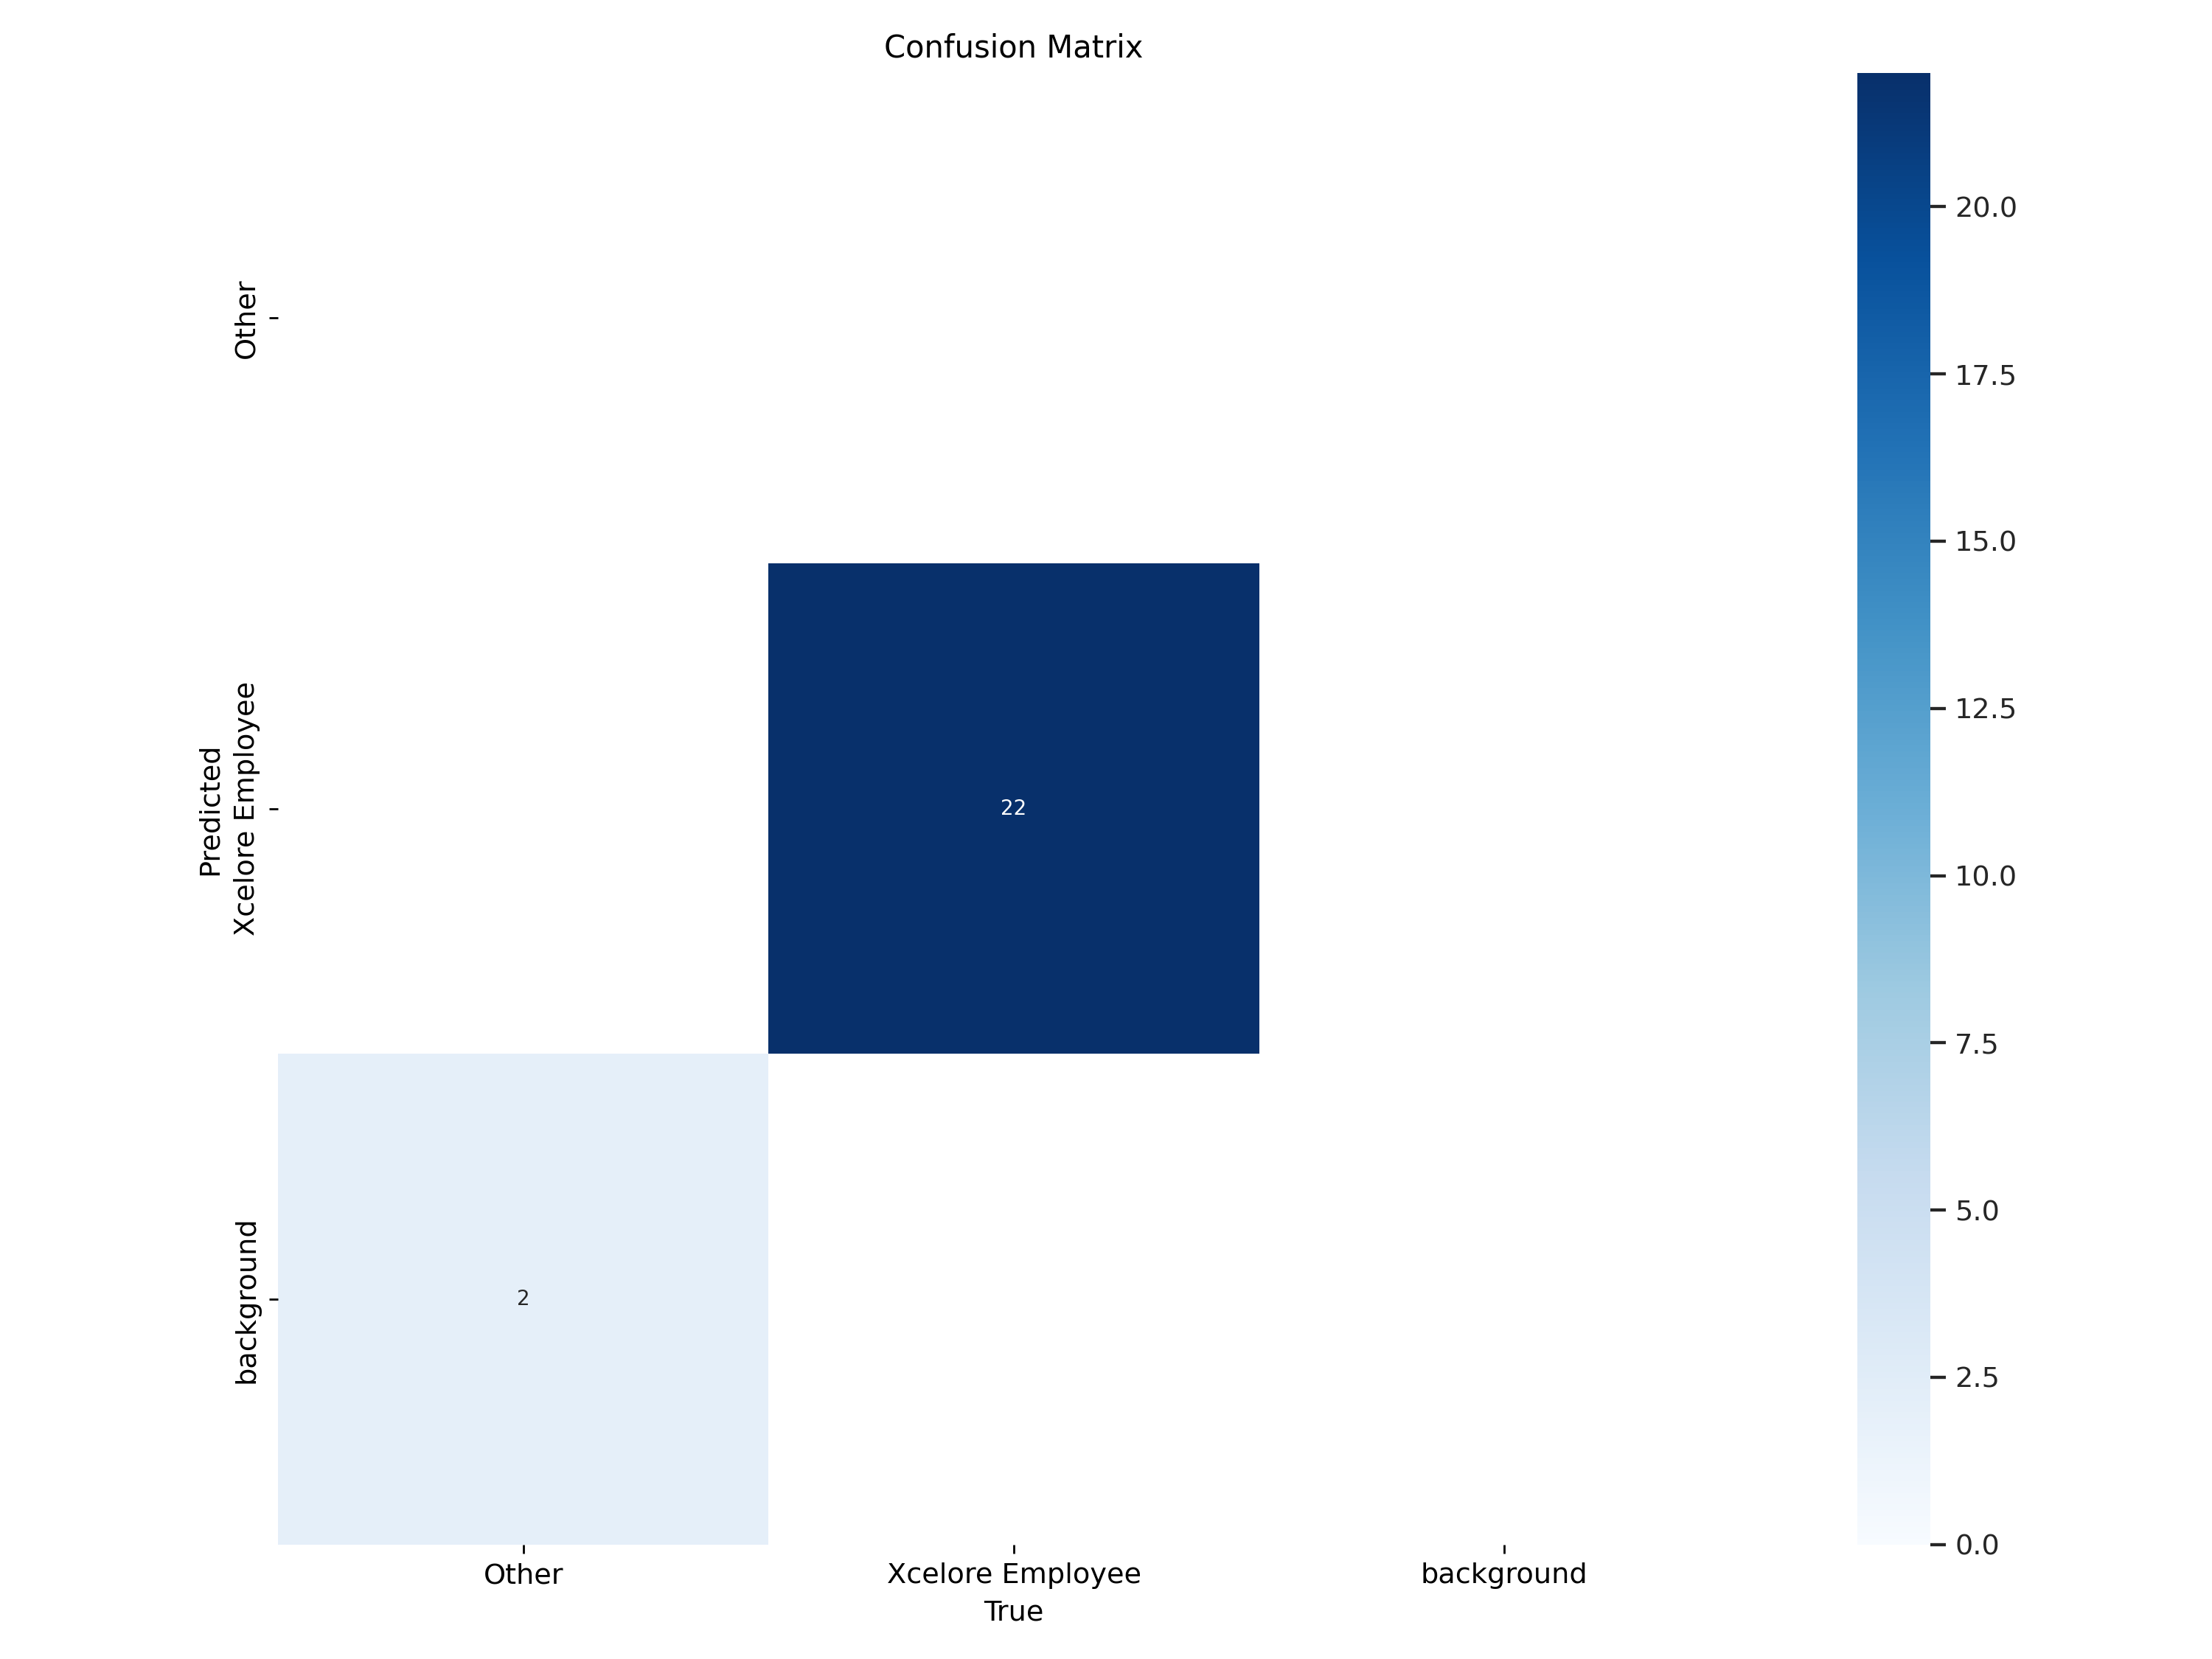

In [ ]:
Image(filename=f'{os.getcwd()}/runs/detect/train/confusion_matrix.png',width=600)

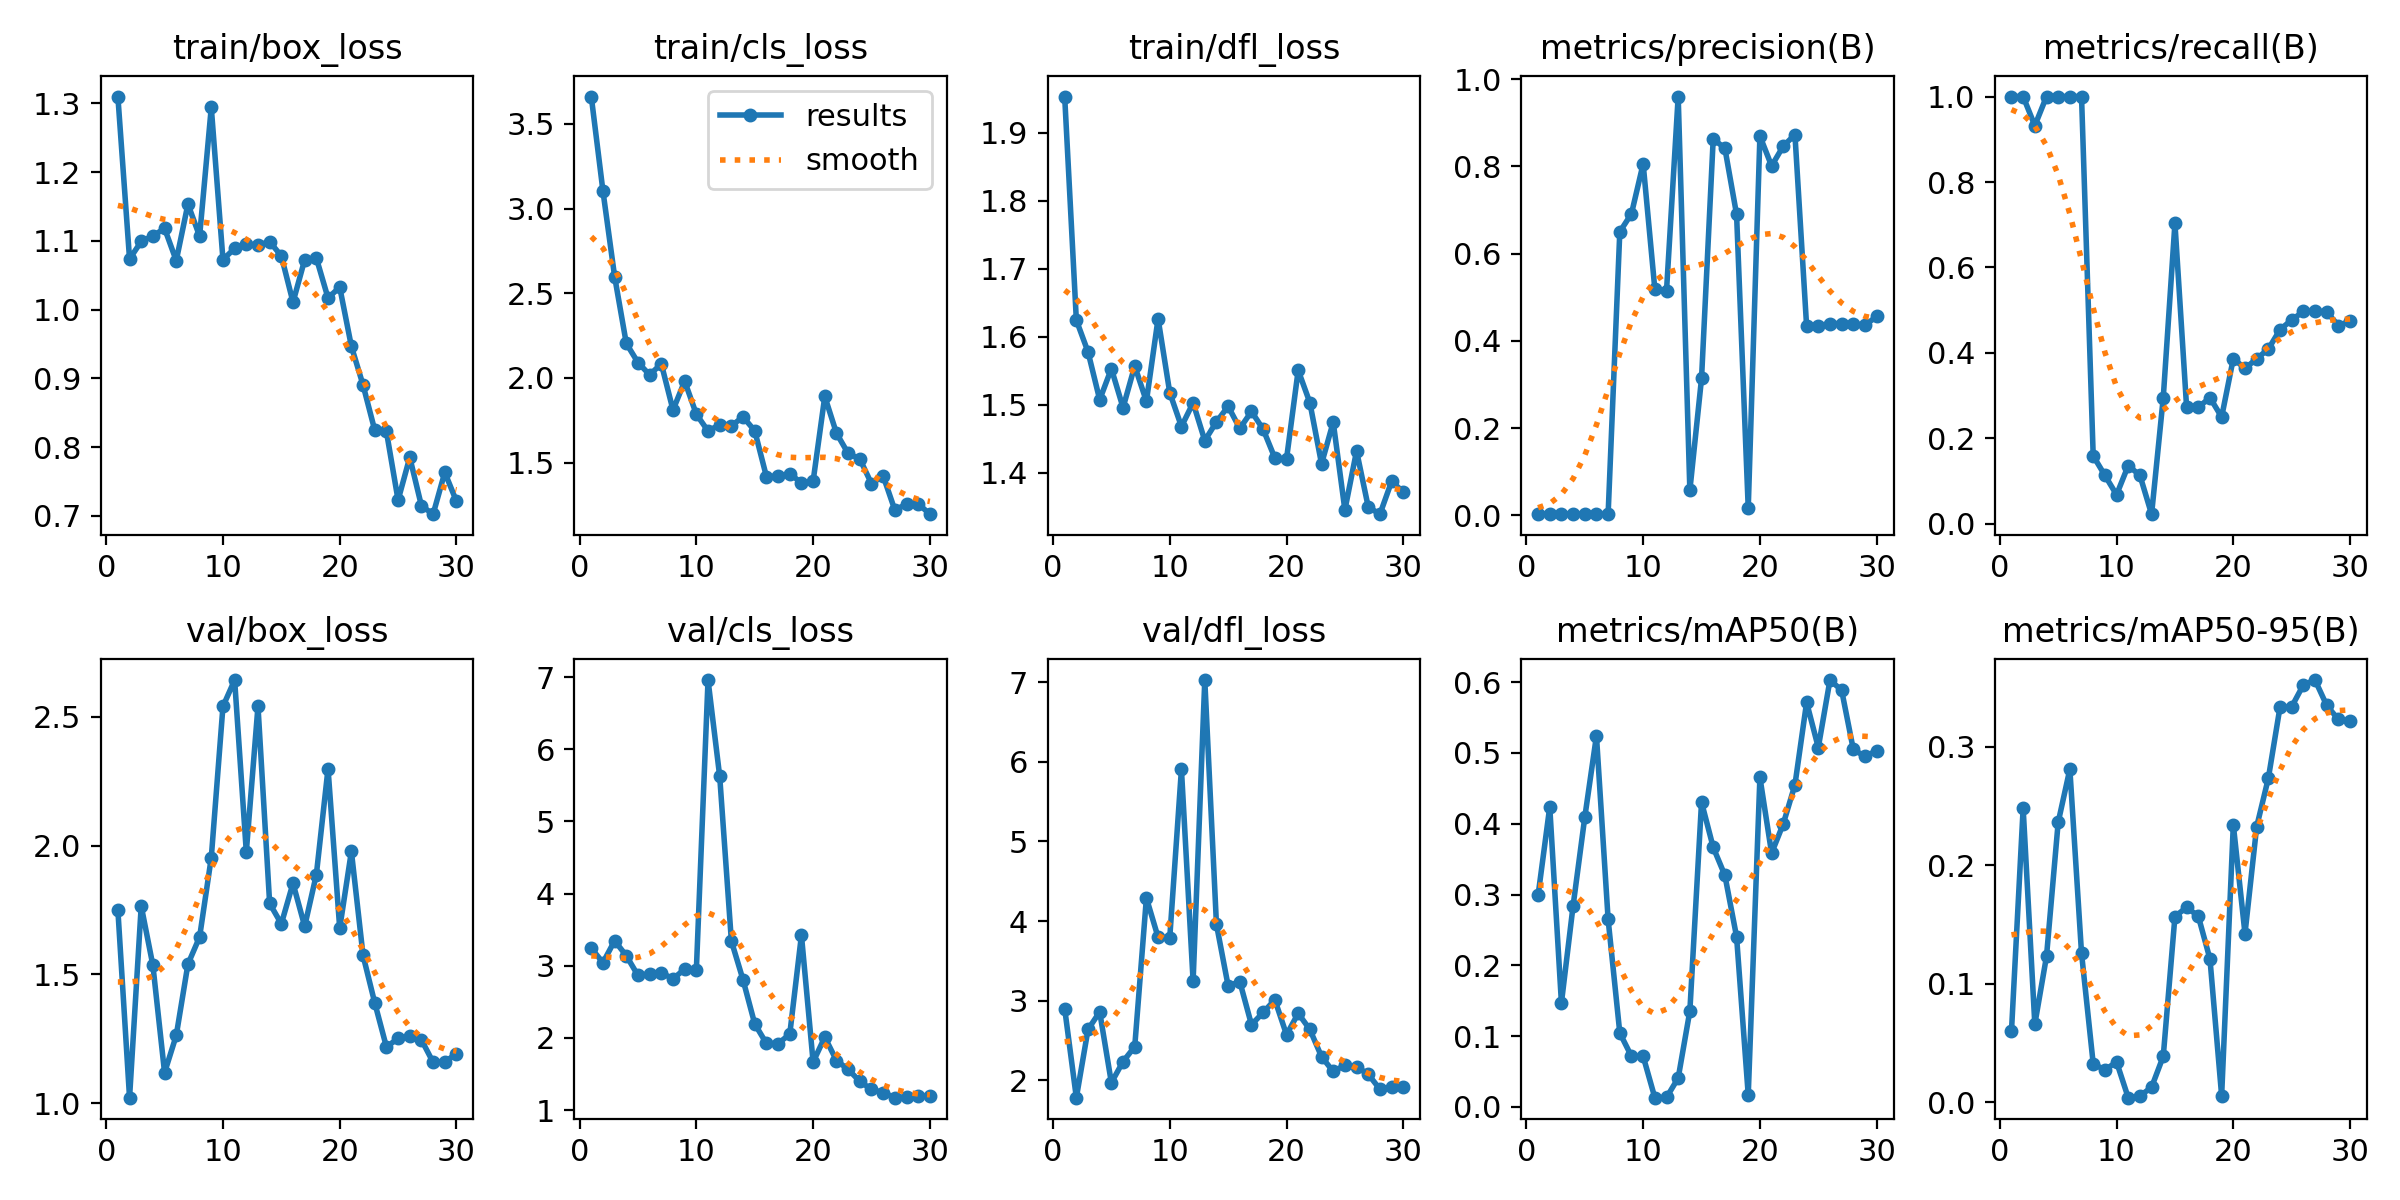

In [ ]:
Image(filename=f'{os.getcwd()}/runs/detect/train/results.png',width=600)

In [ ]:
!yolo task=detect mode=predict model={os.getcwd()}/runs/detect/train/weights/best.pt conf=0.3 source={dataset.location}/train/images

Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 236 layers, 23,203,990 parameters, 0 gradients, 67.4 GFLOPs

image 1/95 /content/Employee-Detection-2/train/images/091af99547435a2a8c0533f2eab74ecd_jpg.rf.a98032b840d48d25c62f54b375b7981d.jpg: 640x640 (no detections), 34.5ms
image 2/95 /content/Employee-Detection-2/train/images/0cdde47afbce7d5265dd20aaa4f1e694_jpg.rf.0edaa5657e0a912664bb7f135bf4a697.jpg: 640x640 1 Xcelore Employee, 34.4ms
image 3/95 /content/Employee-Detection-2/train/images/1641209830589_jpg.rf.06b7b40655837a78dc101b32c9f09664.jpg: 640x640 1 Xcelore Employee, 34.5ms
image 4/95 /content/Employee-Detection-2/train/images/19ad5bd7842d55ec4b087d77de774ea4_jpg.rf.1f3b0a9ad03cea434c90f7c23f5c2c94.jpg: 640x640 1 Xcelore Employee, 34.3ms
image 5/95 /content/Employee-Detection-2/train/images/1aad3f7e7fddb5fadbd23c261c652309_jpg.rf.9c89f811be15b2e9ba3c1f61c5c2bd98.jpg: 640x640 (no detections), 34.3ms
image 6/95 /content/Emplo

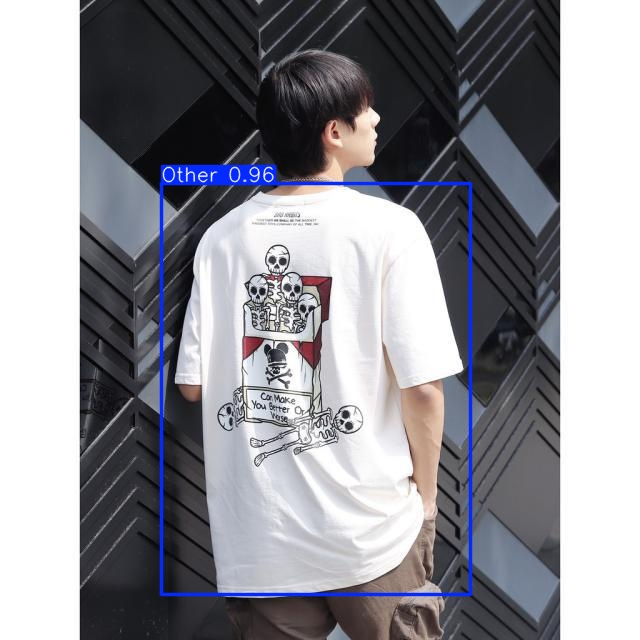

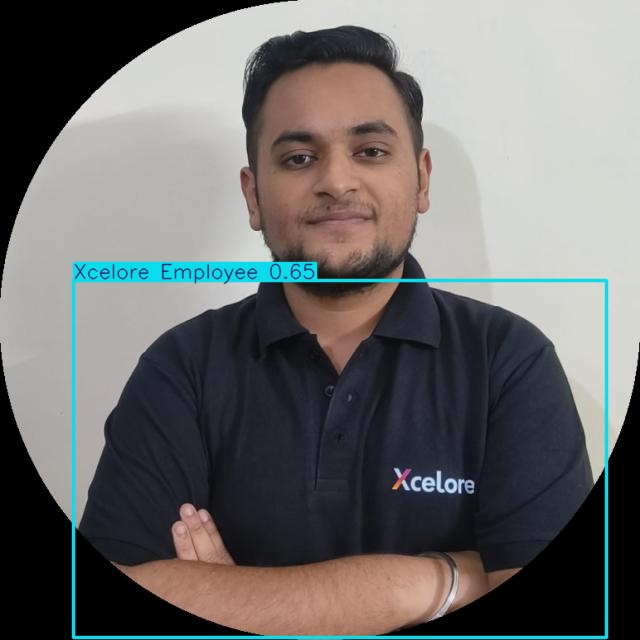

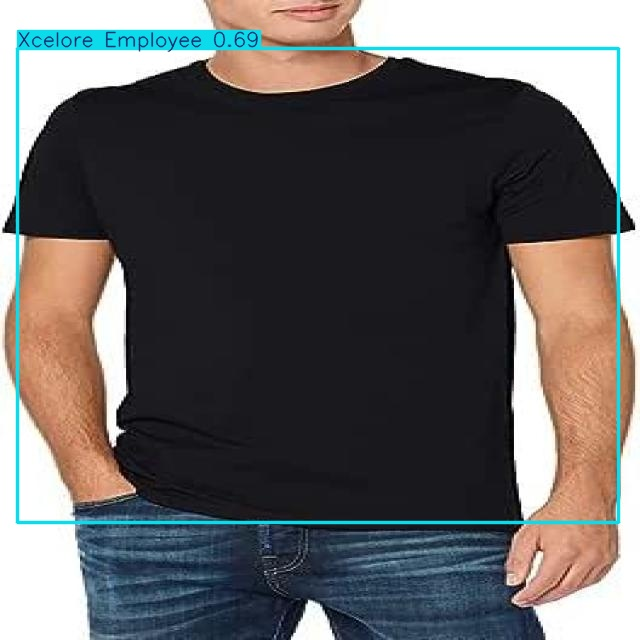

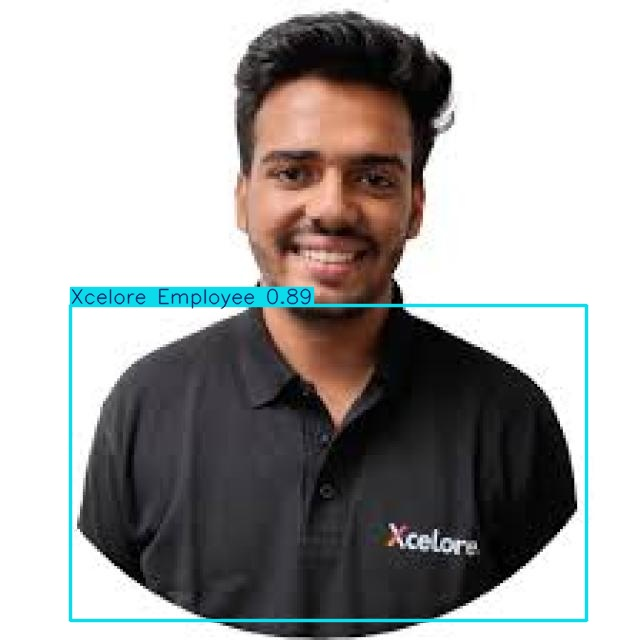

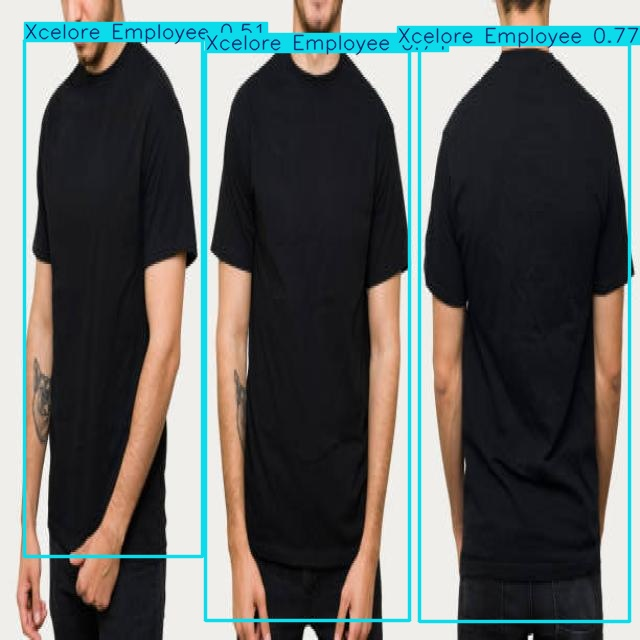

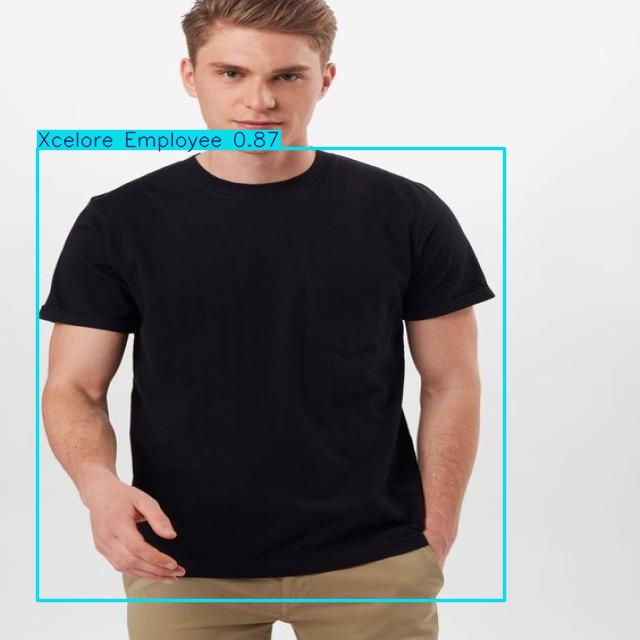

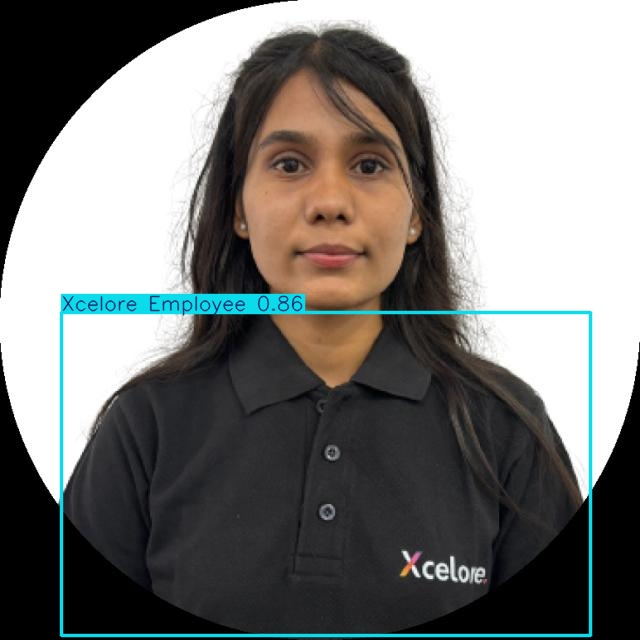

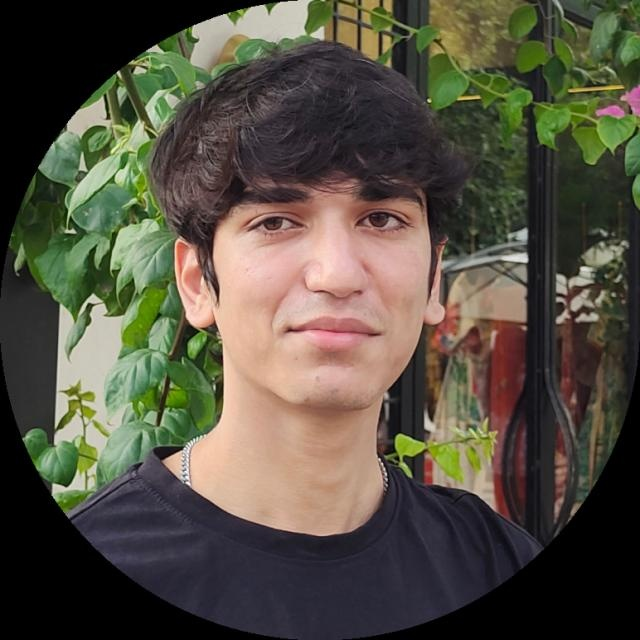

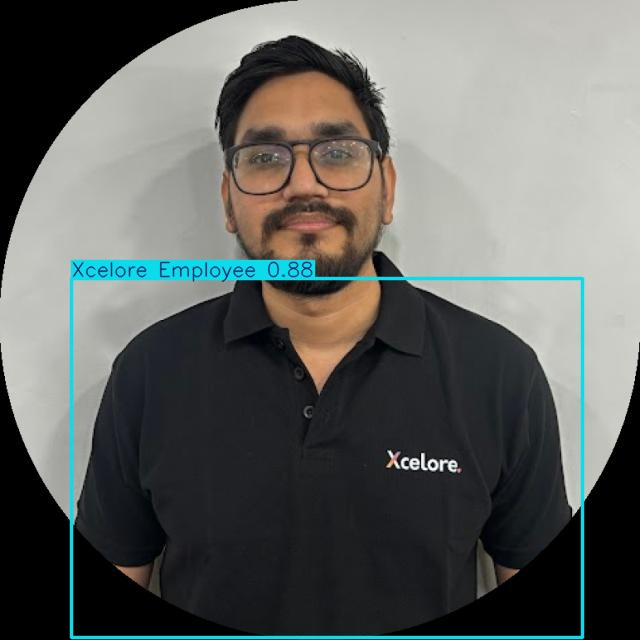

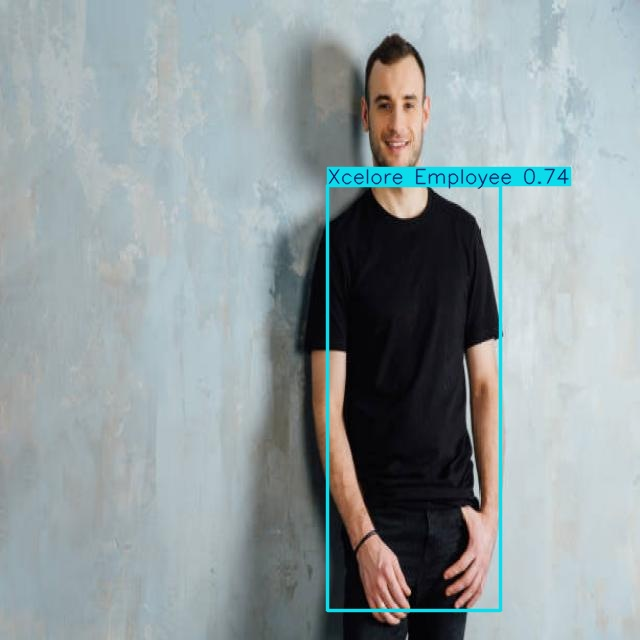

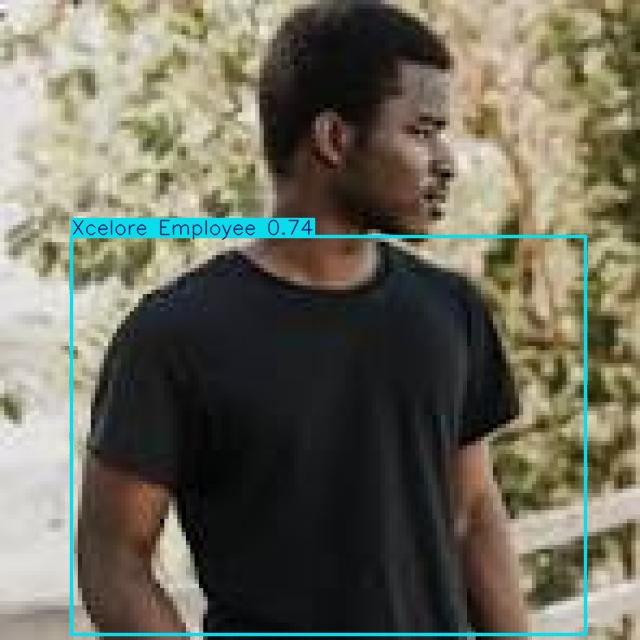

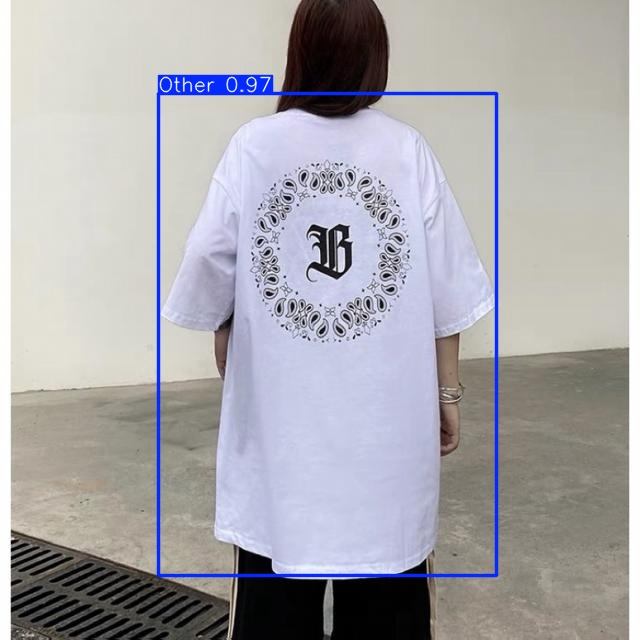

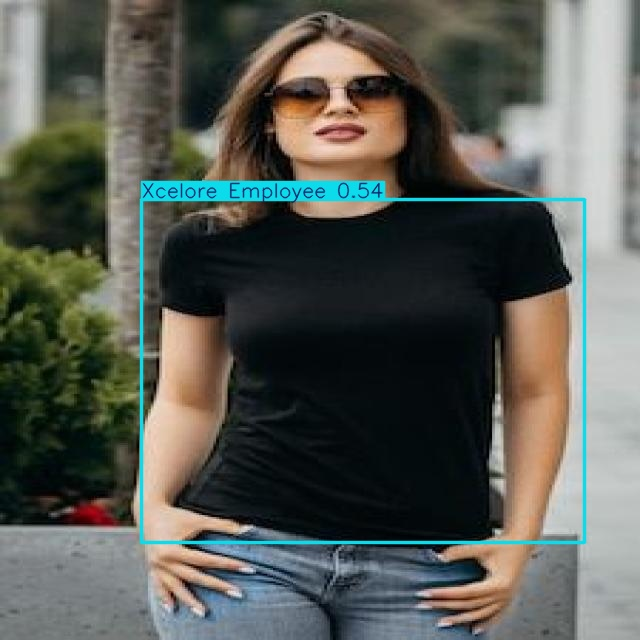

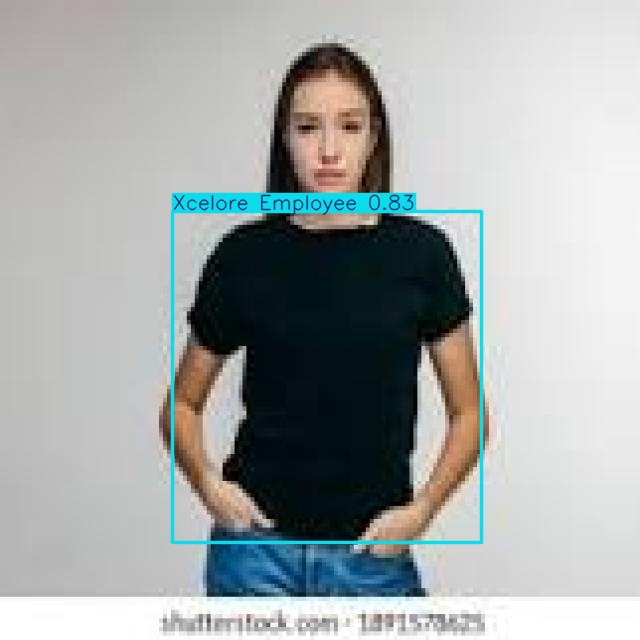

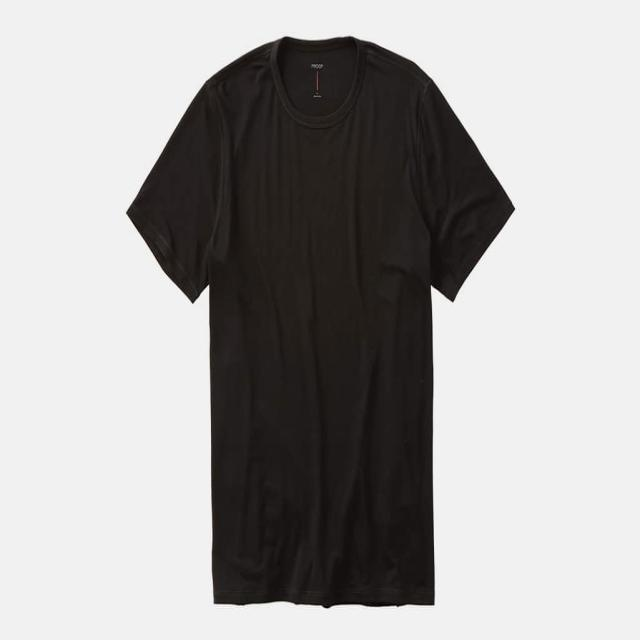

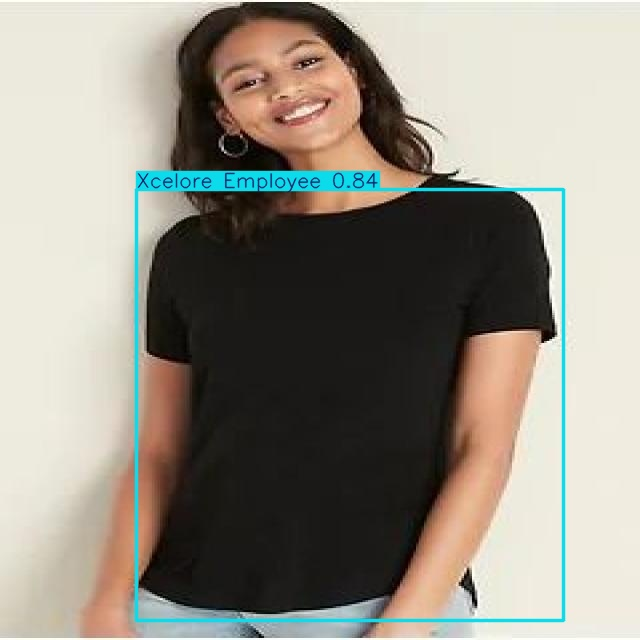

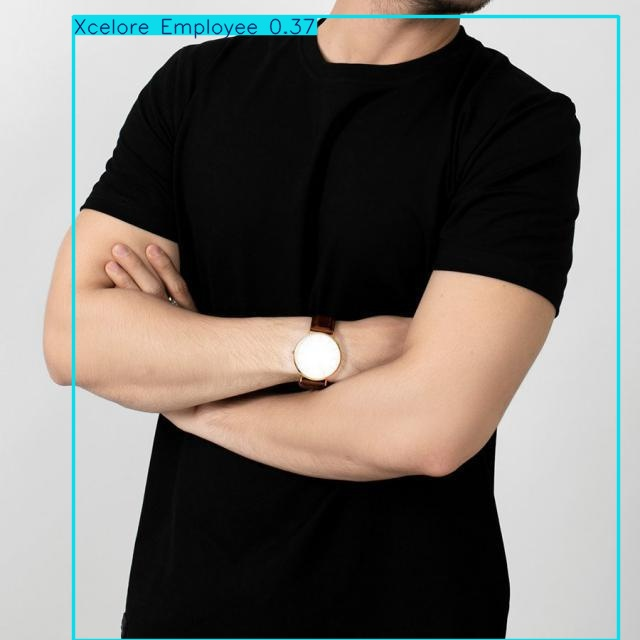

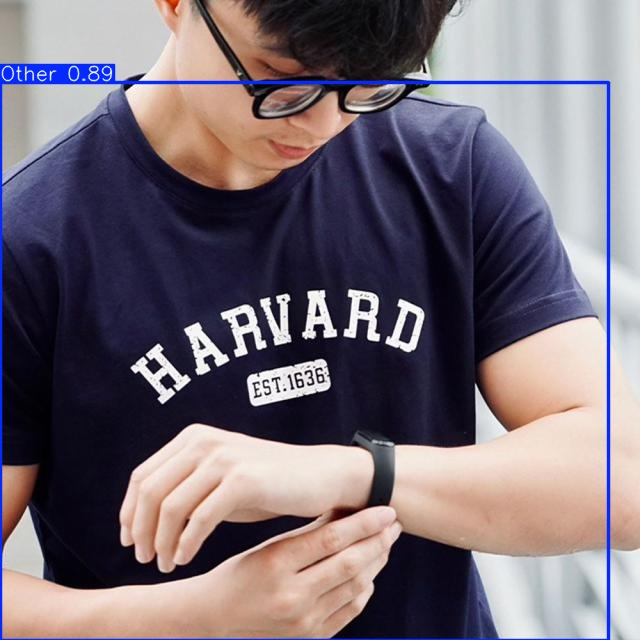

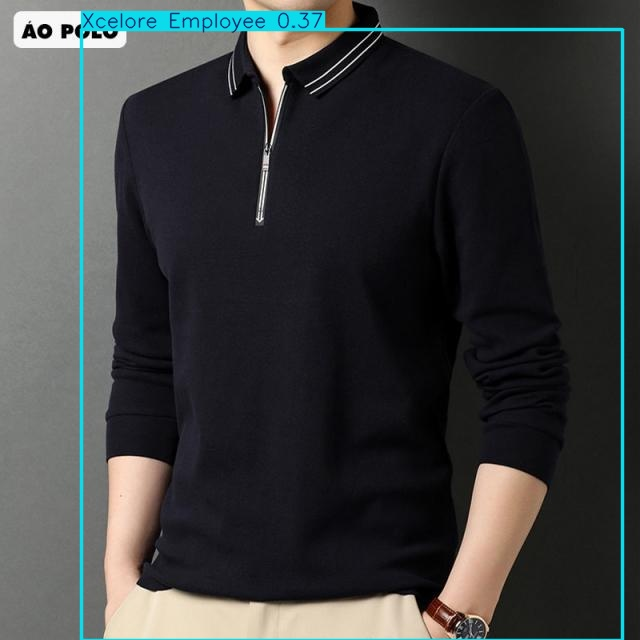

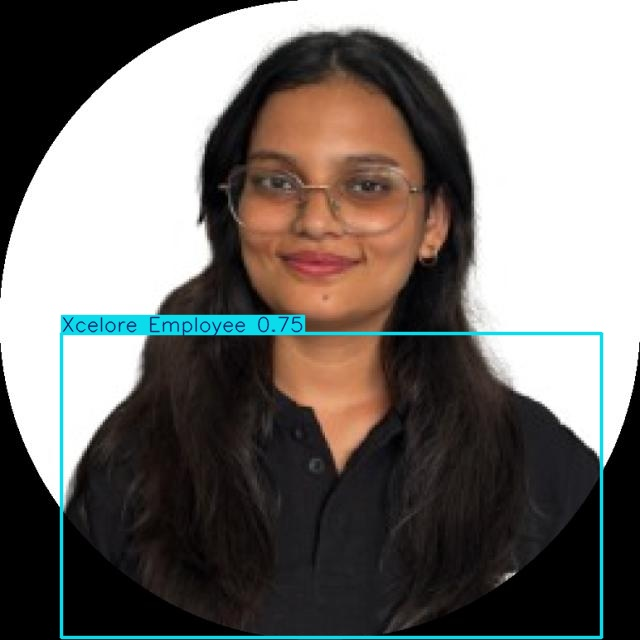

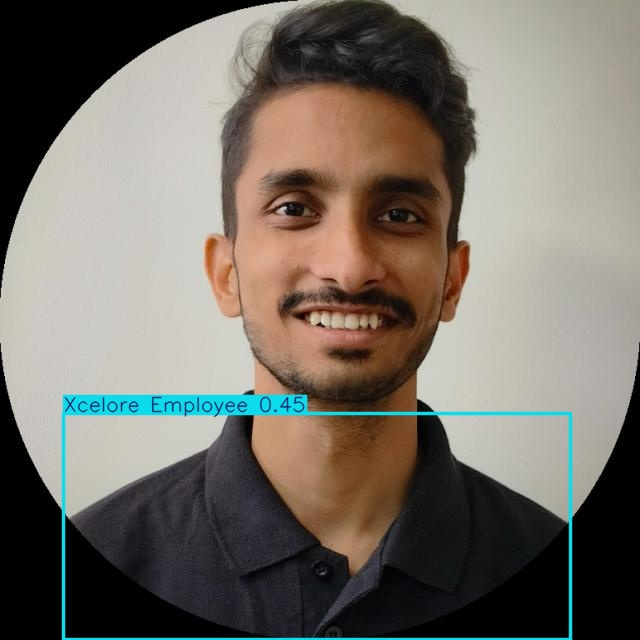

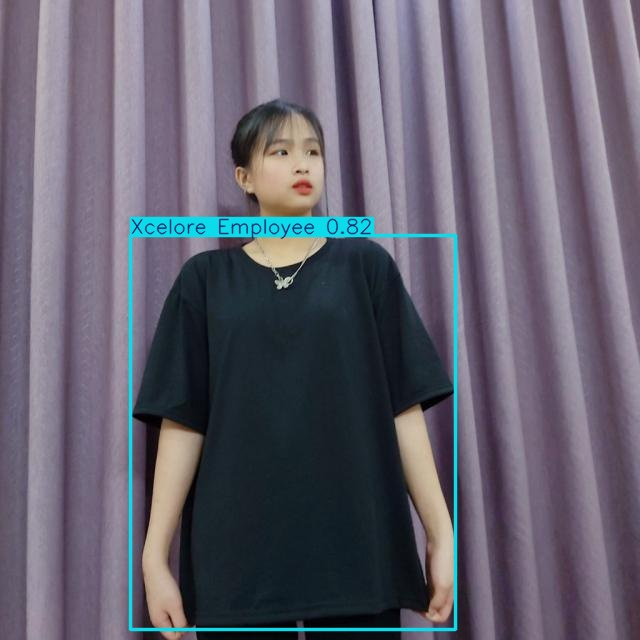

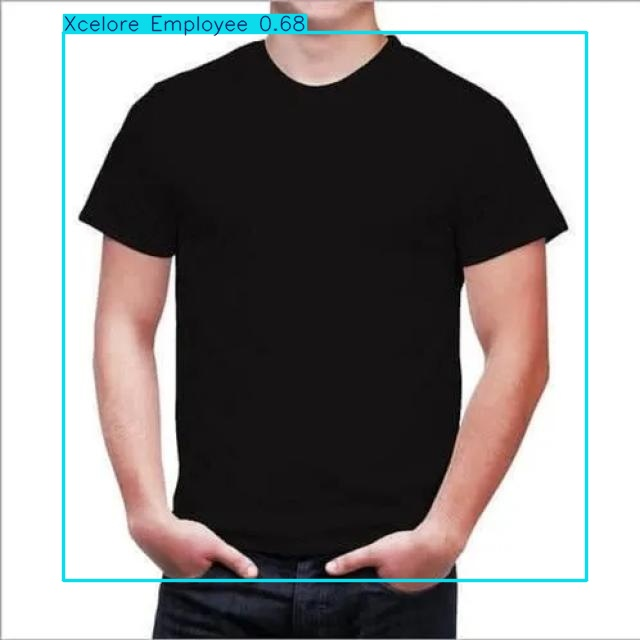

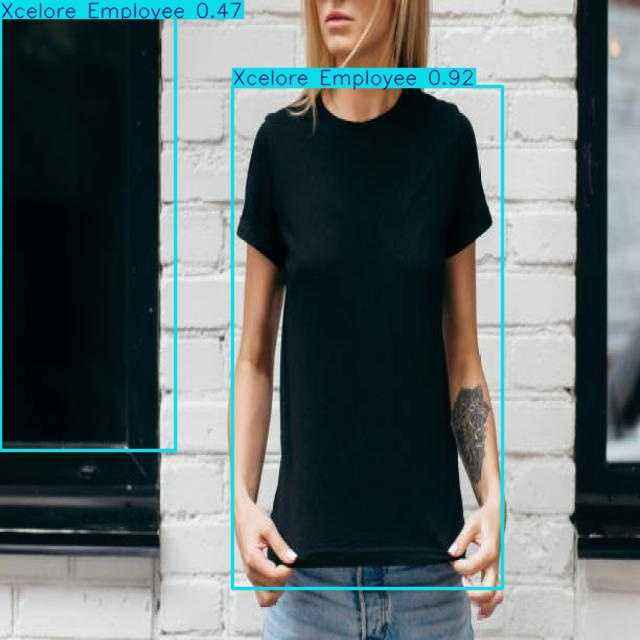

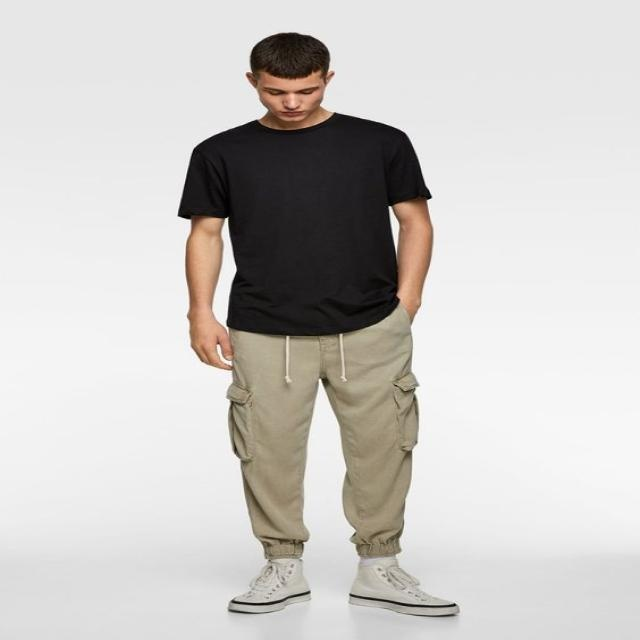

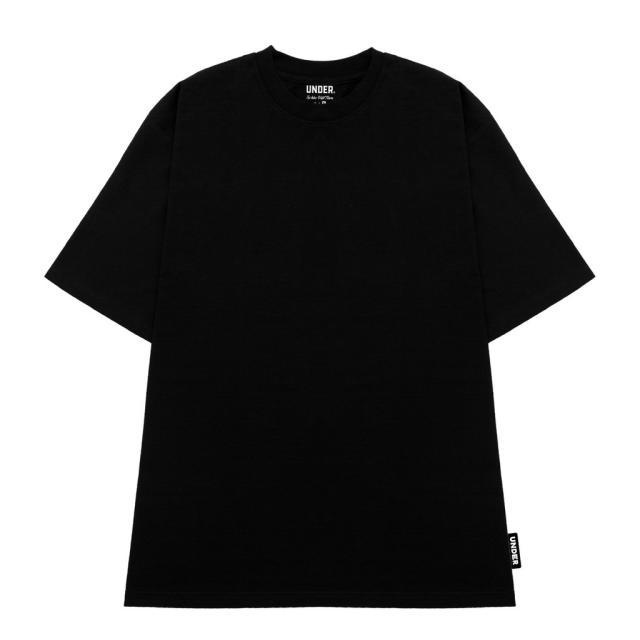

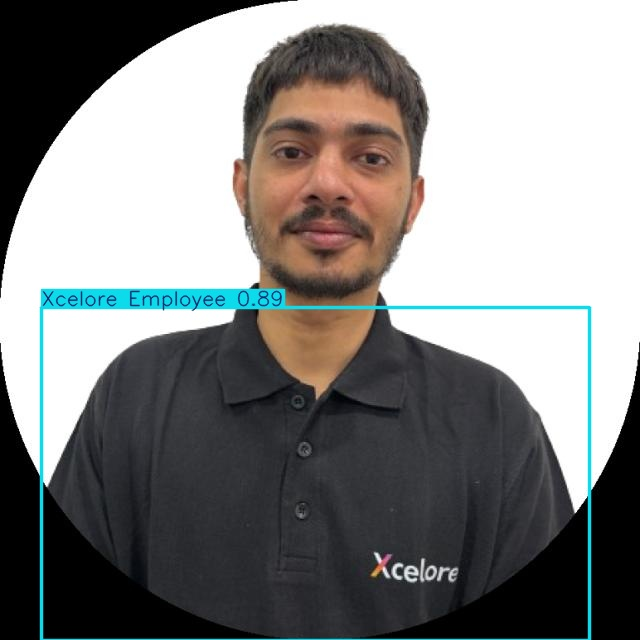

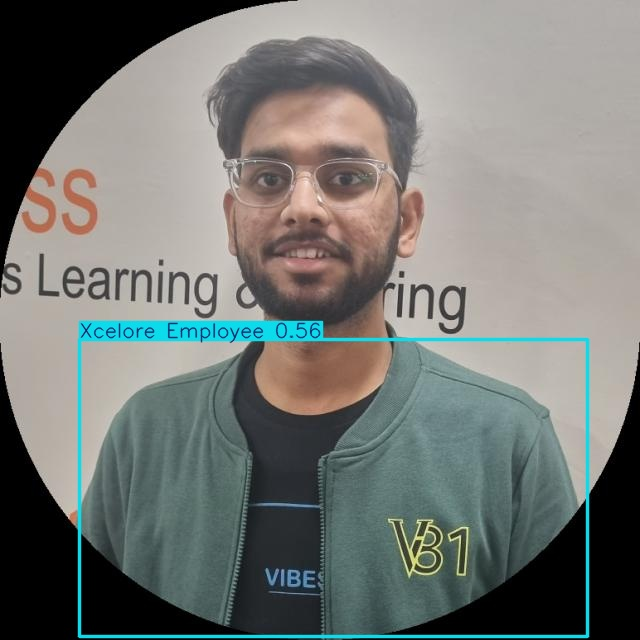

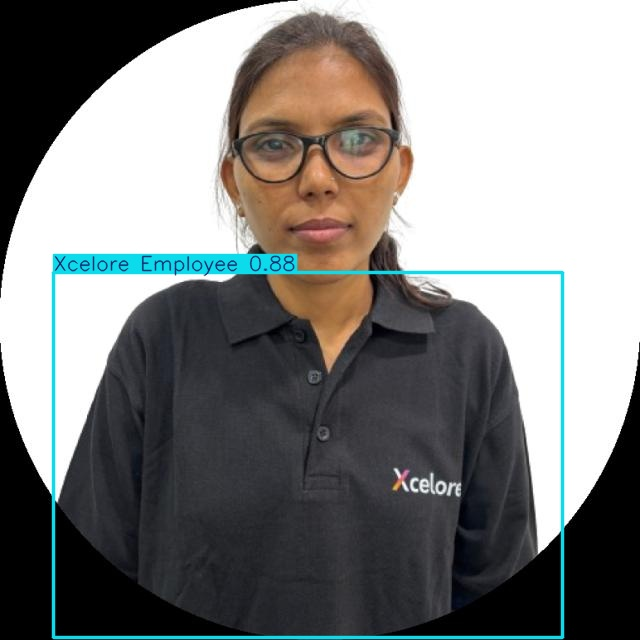

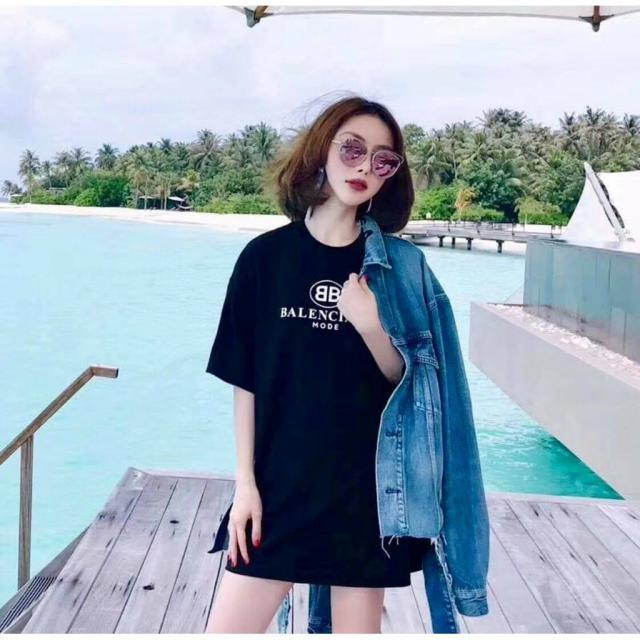

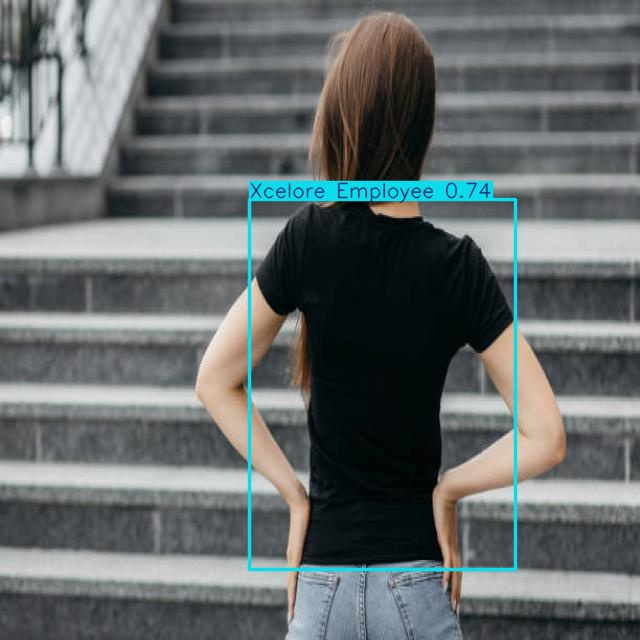

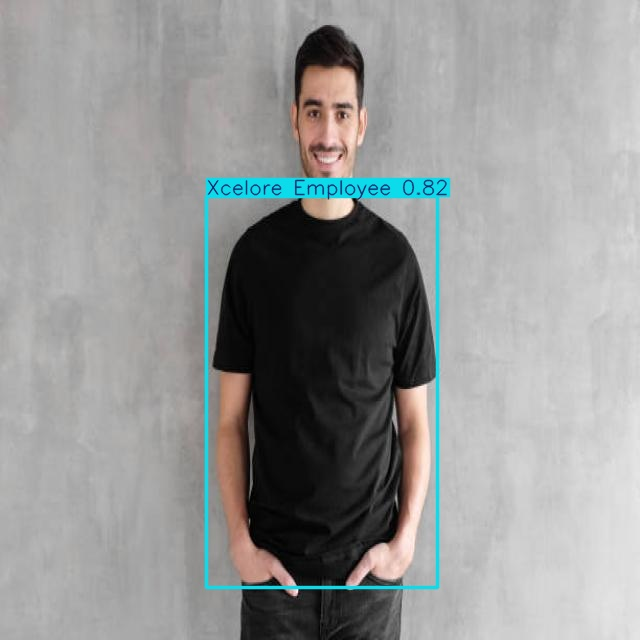

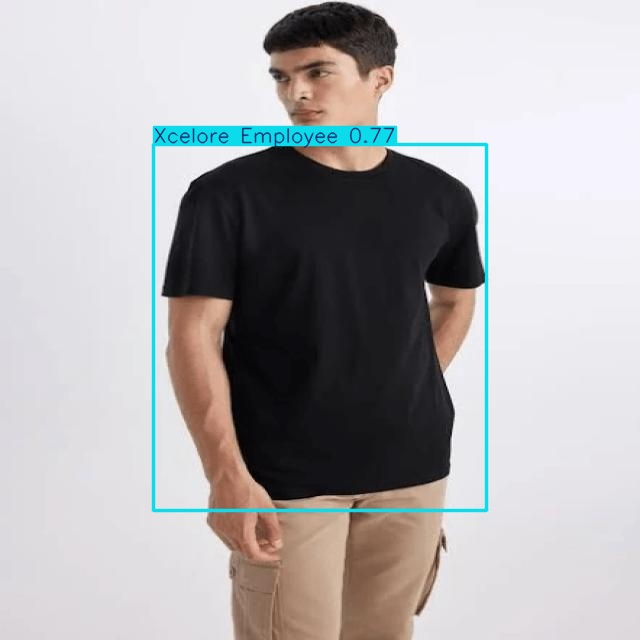

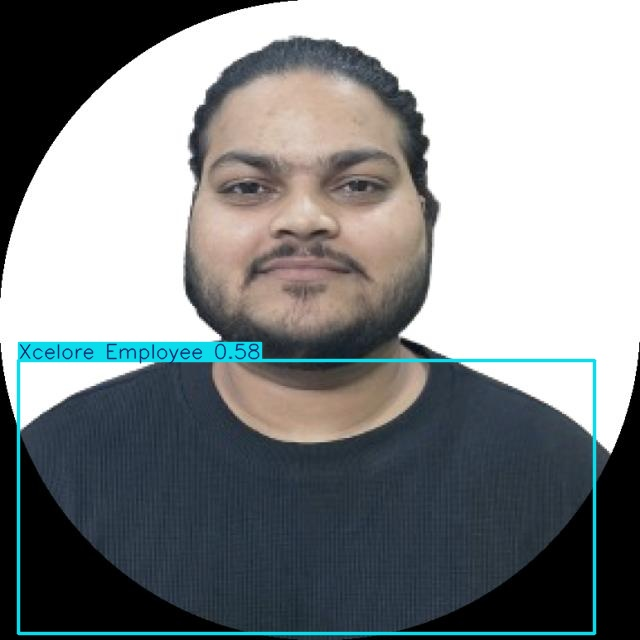

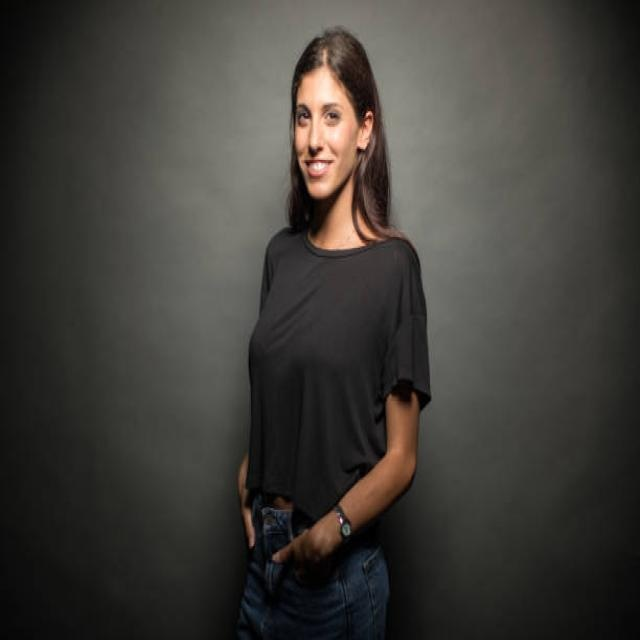

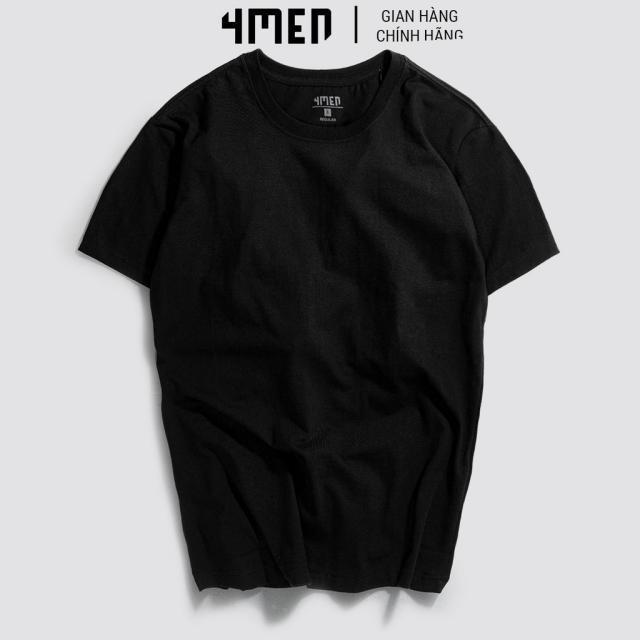

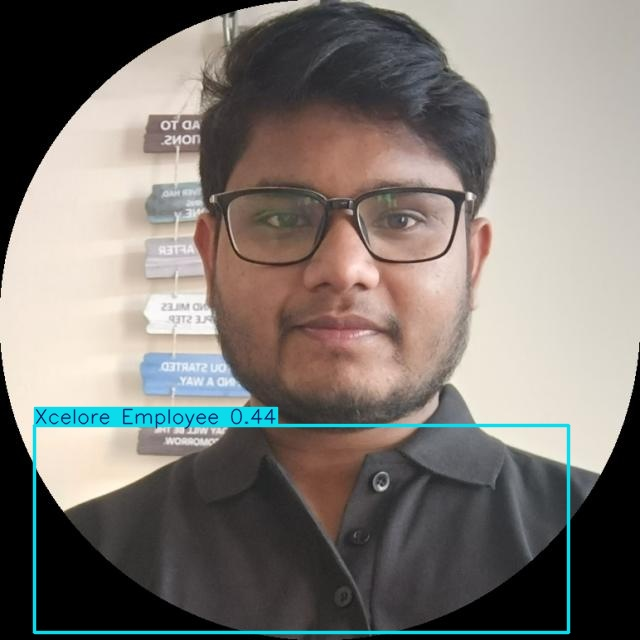

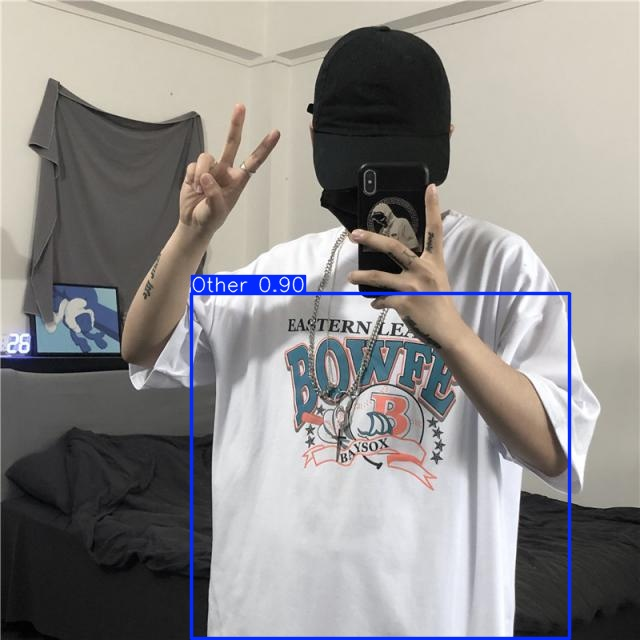

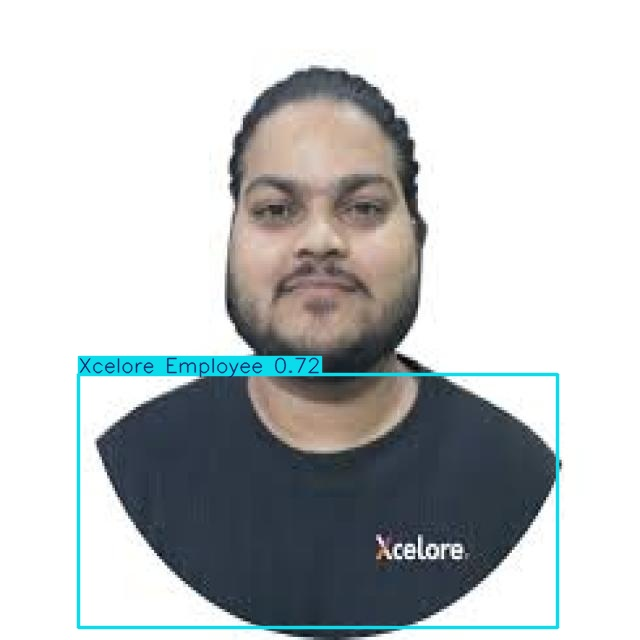

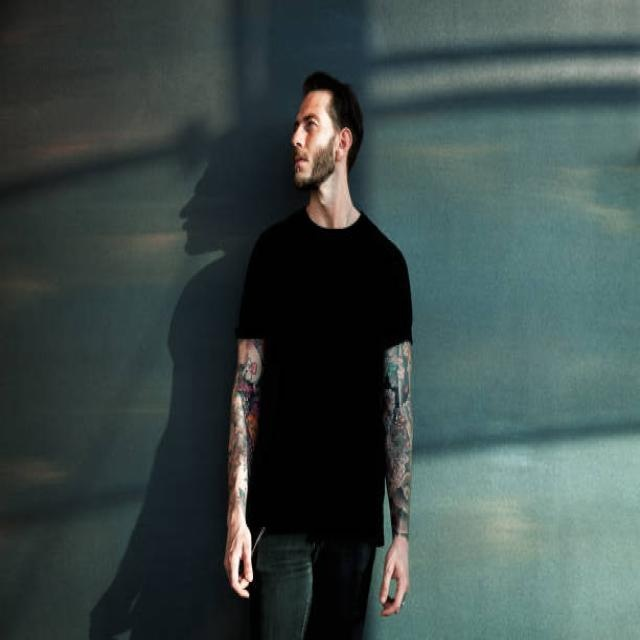

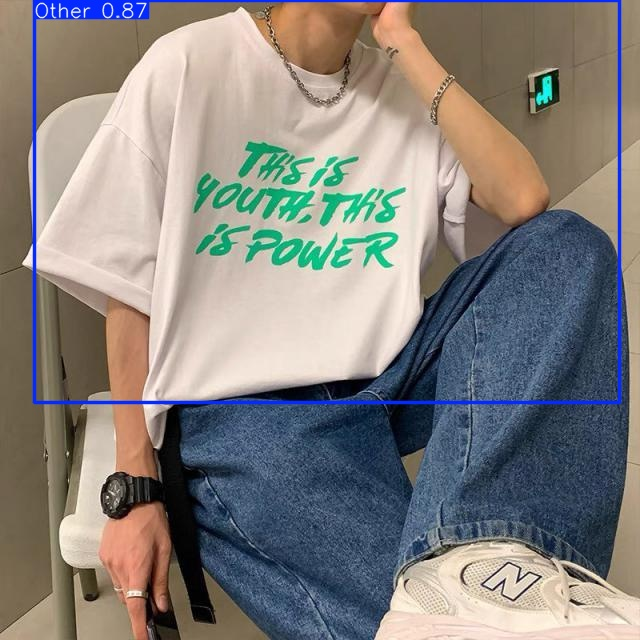

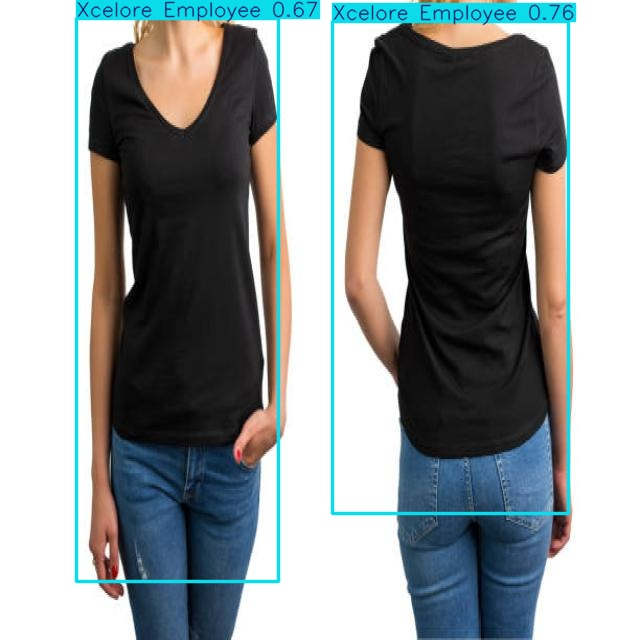

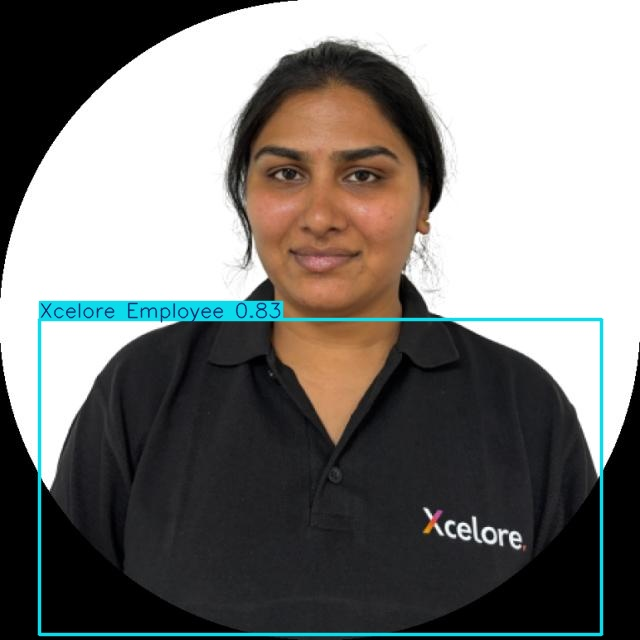

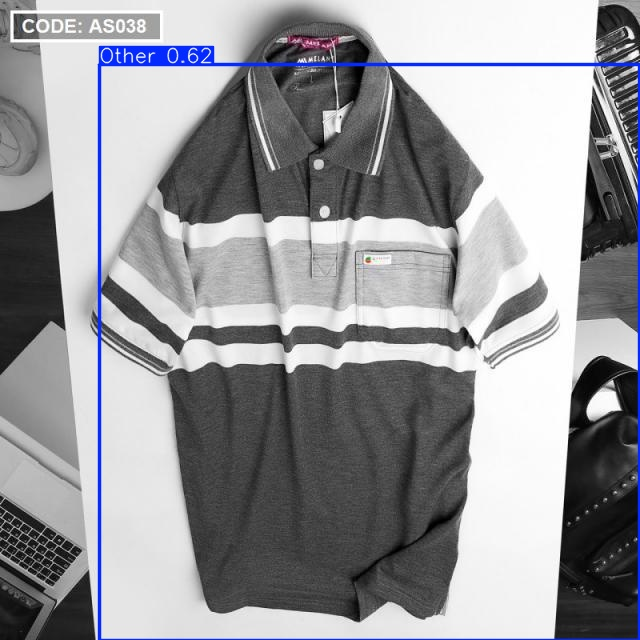

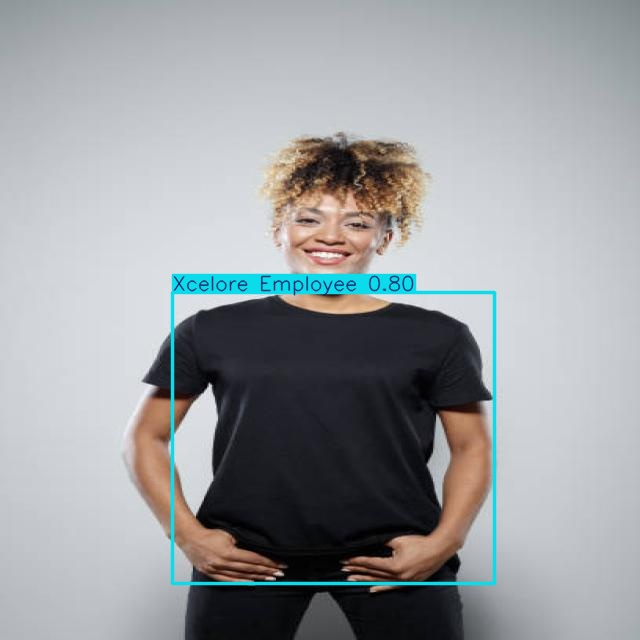

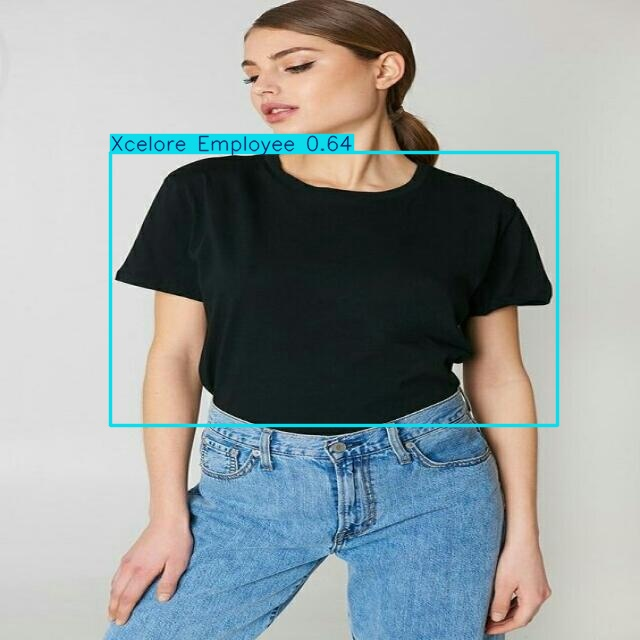

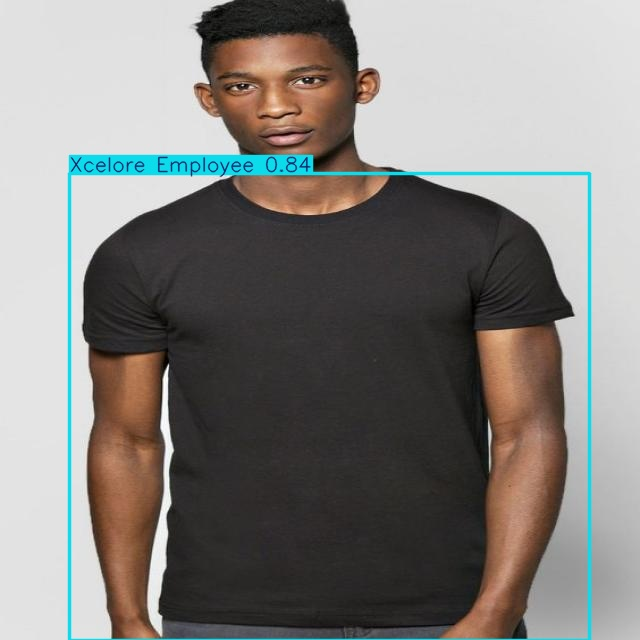

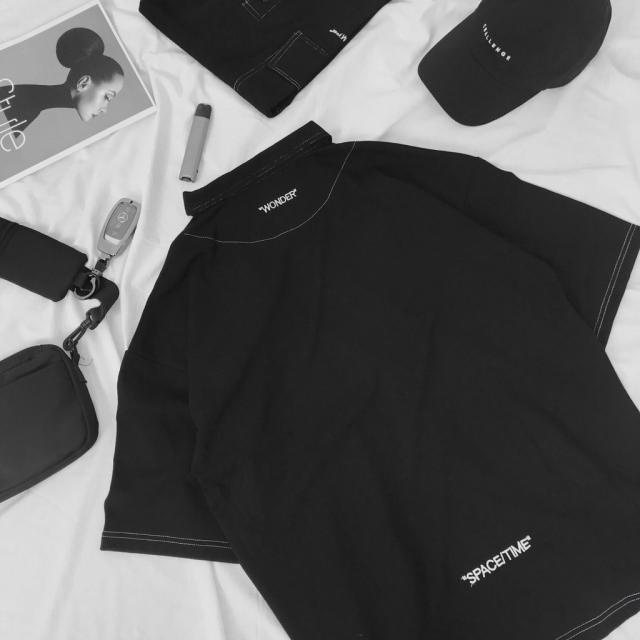

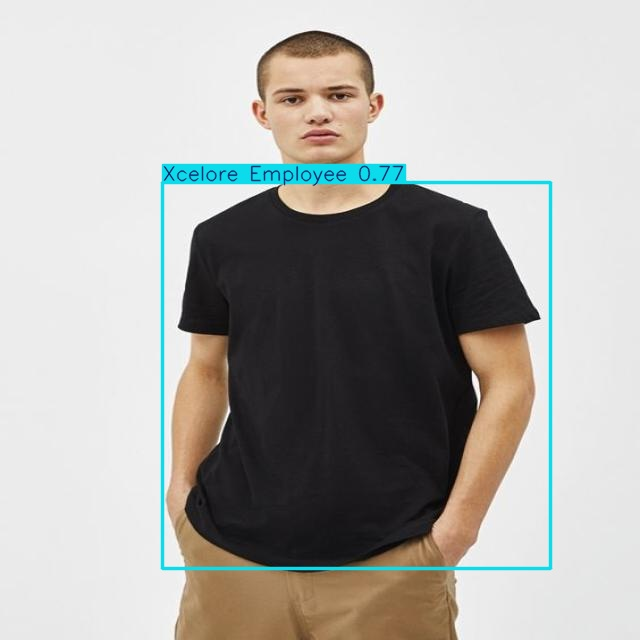

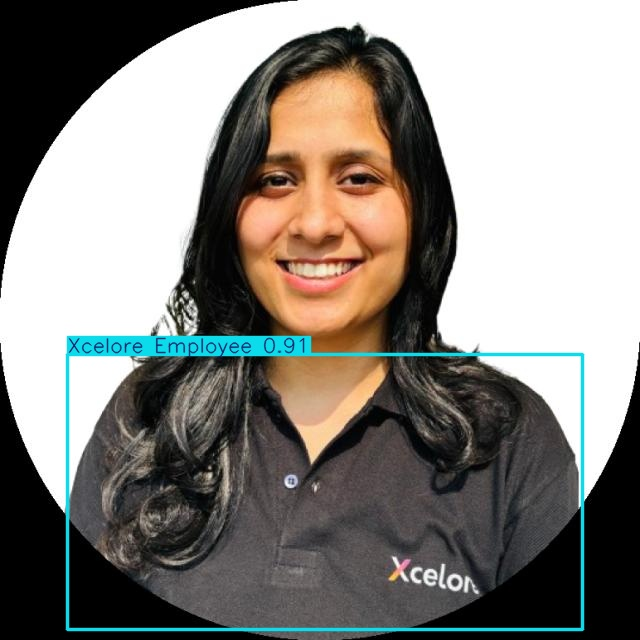

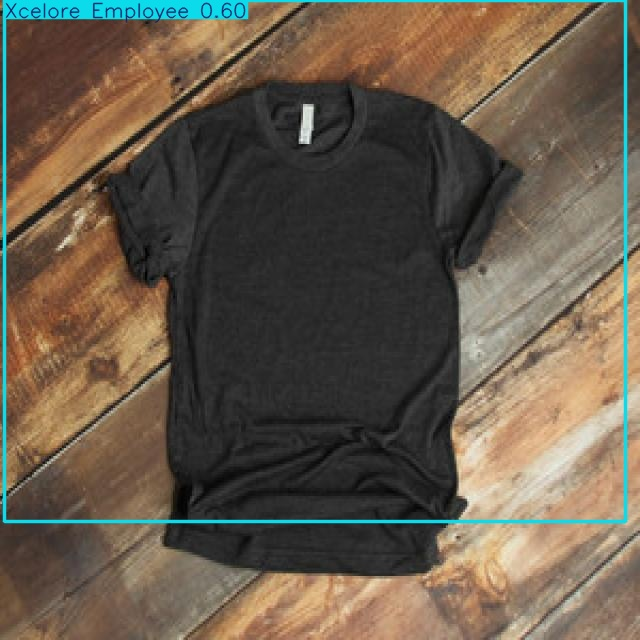

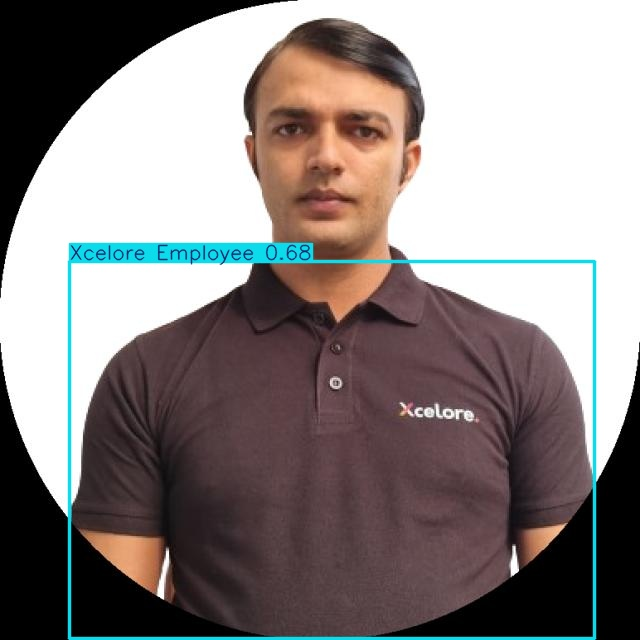

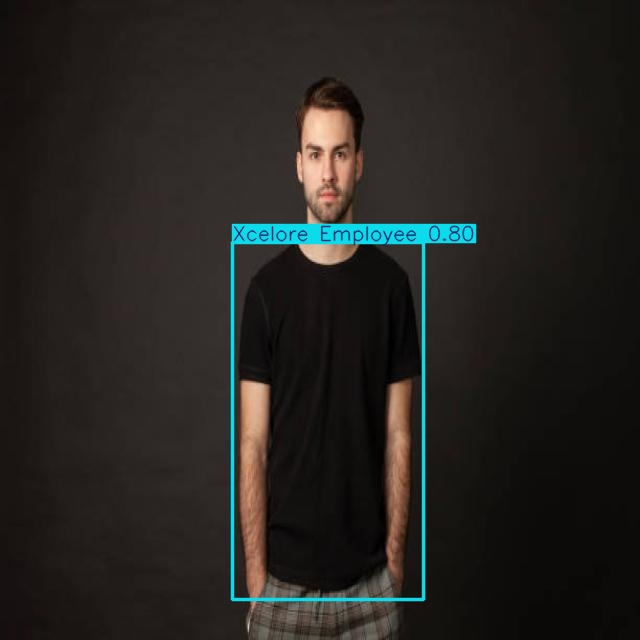

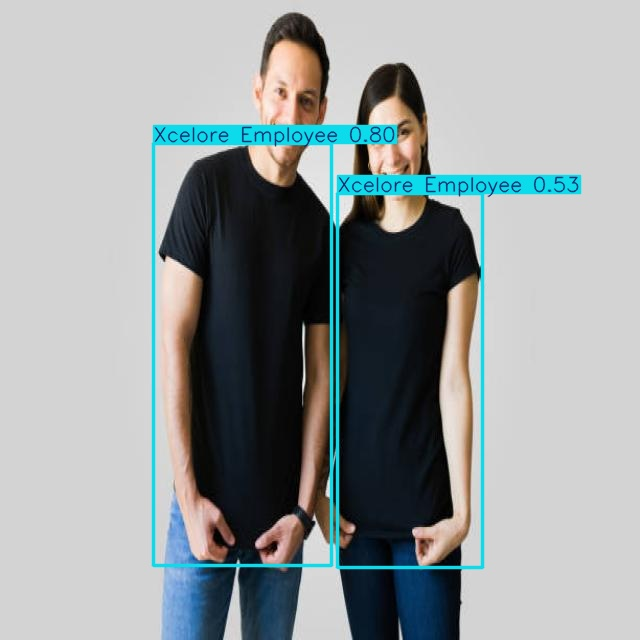

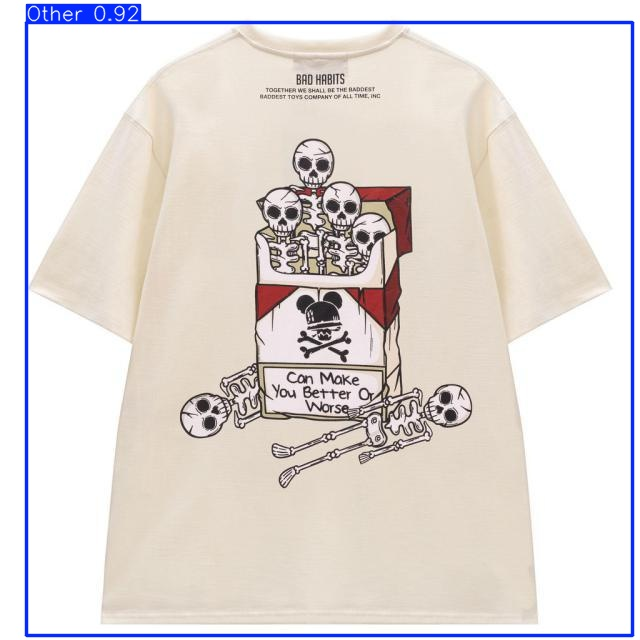

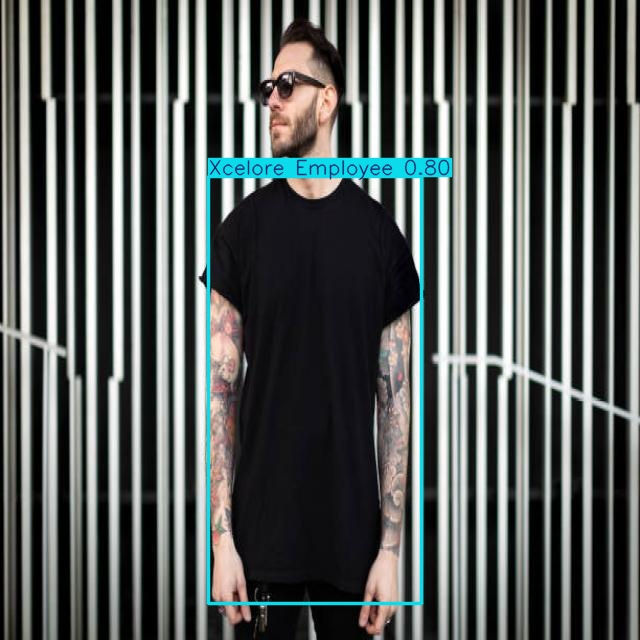

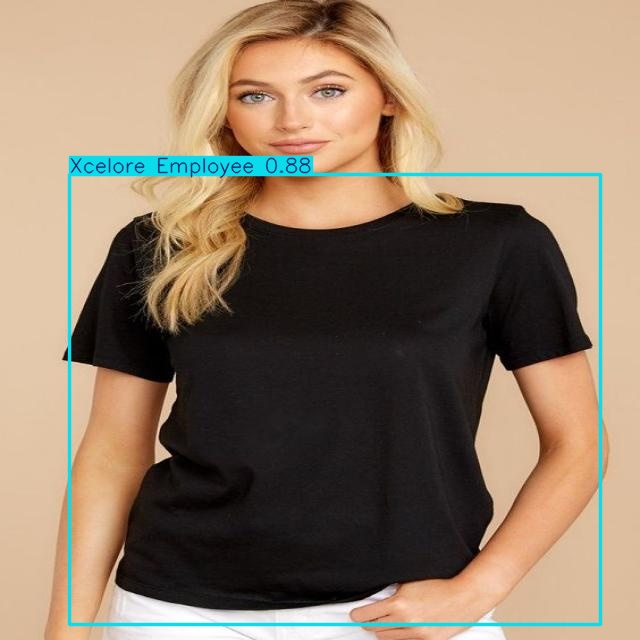

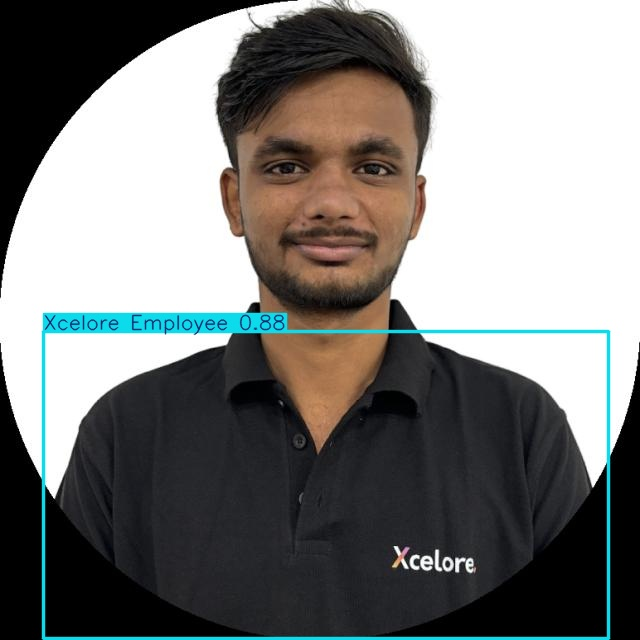

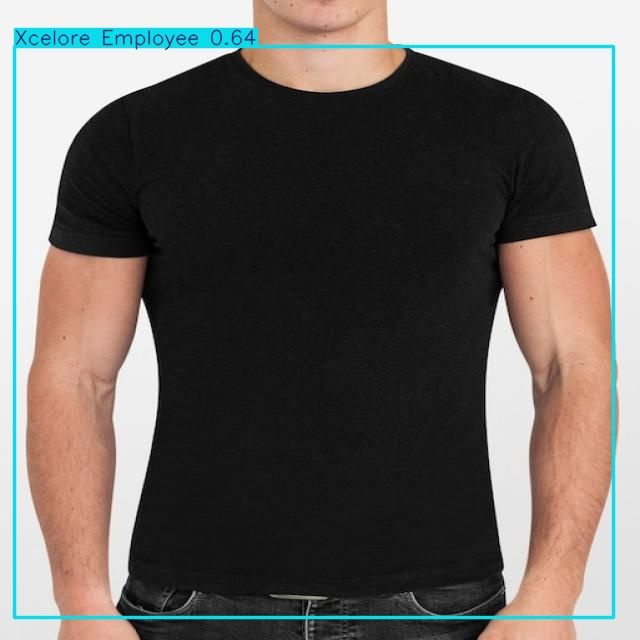

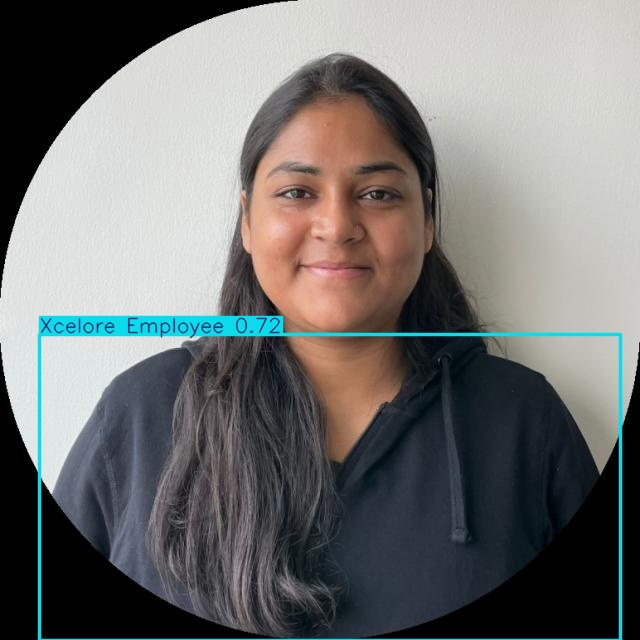

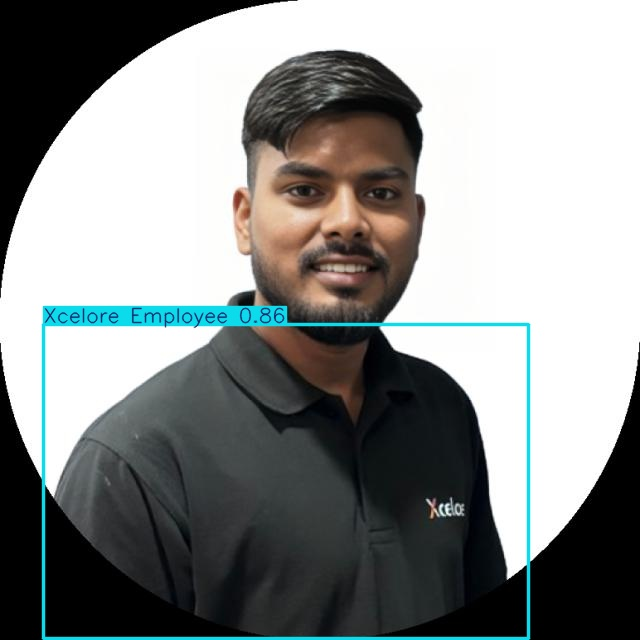

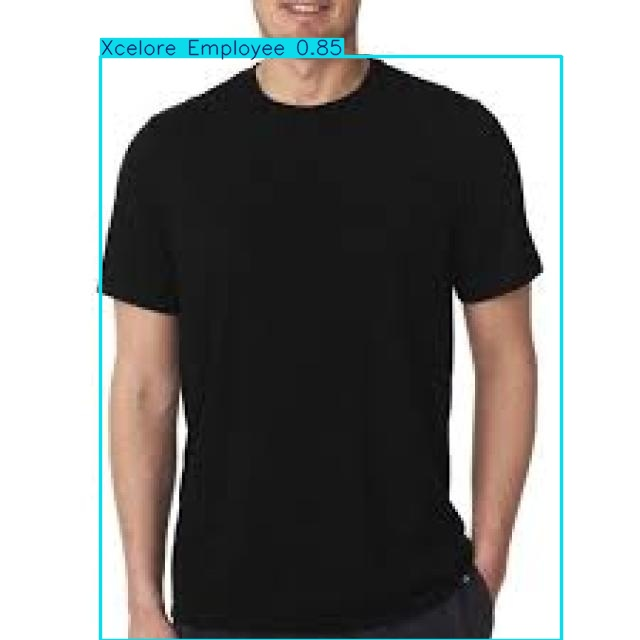

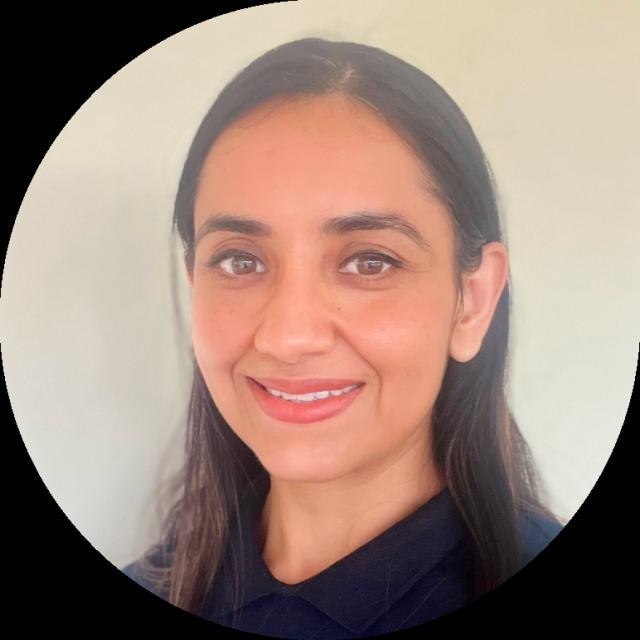

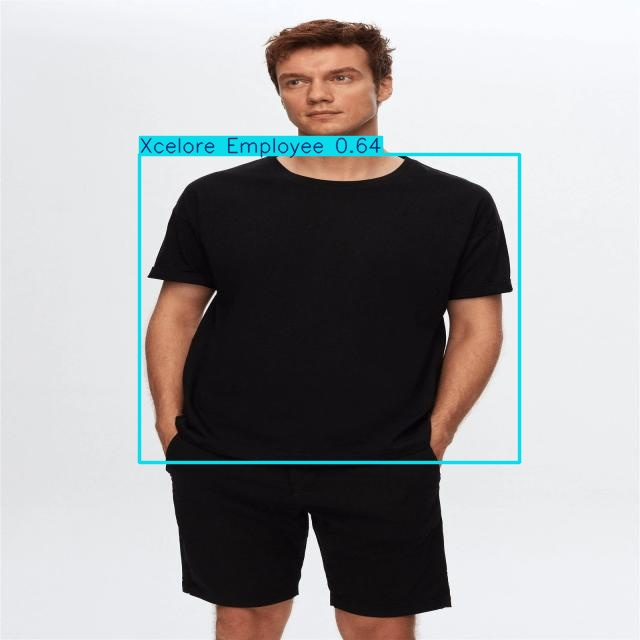

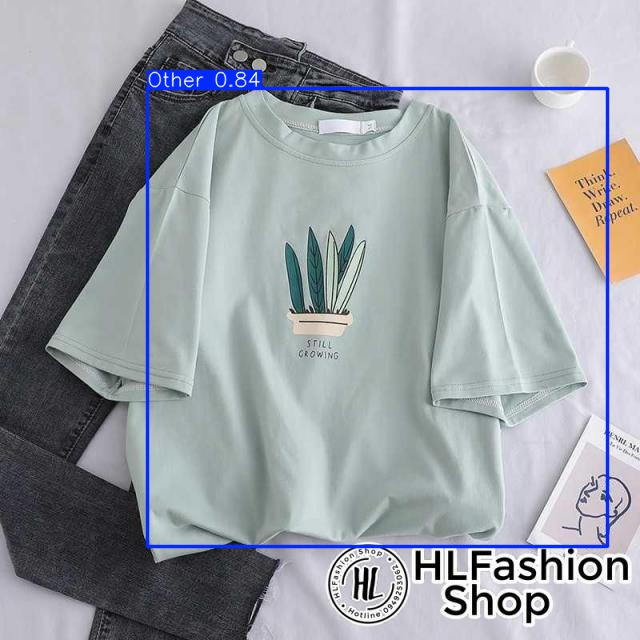

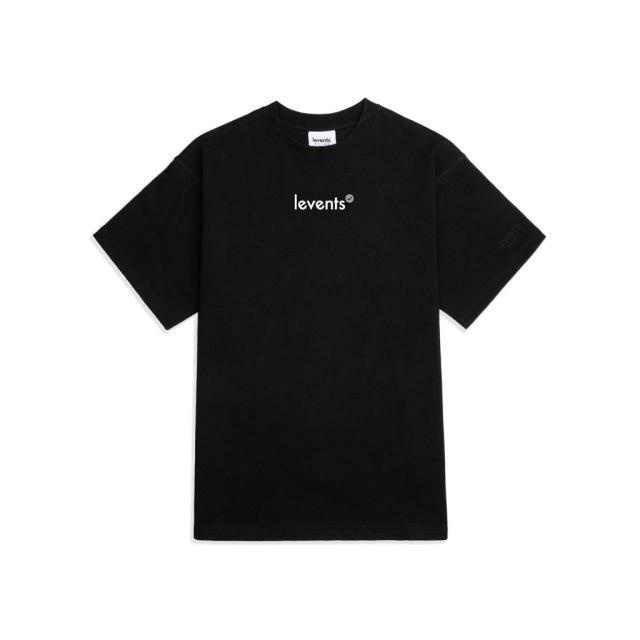

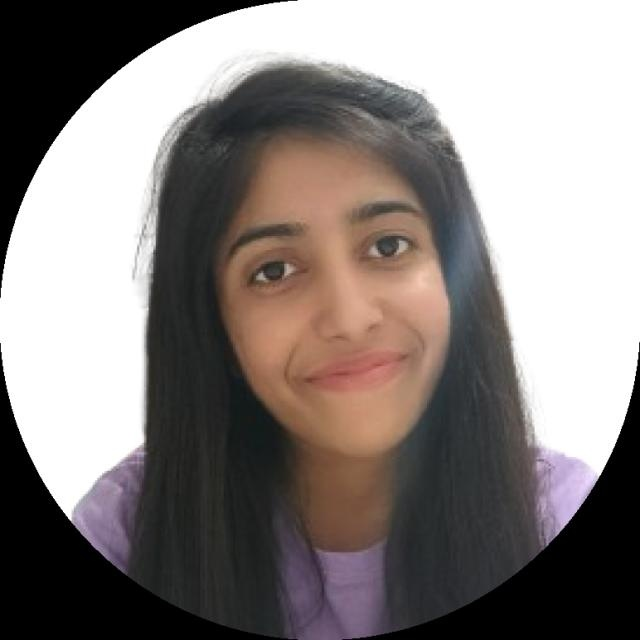

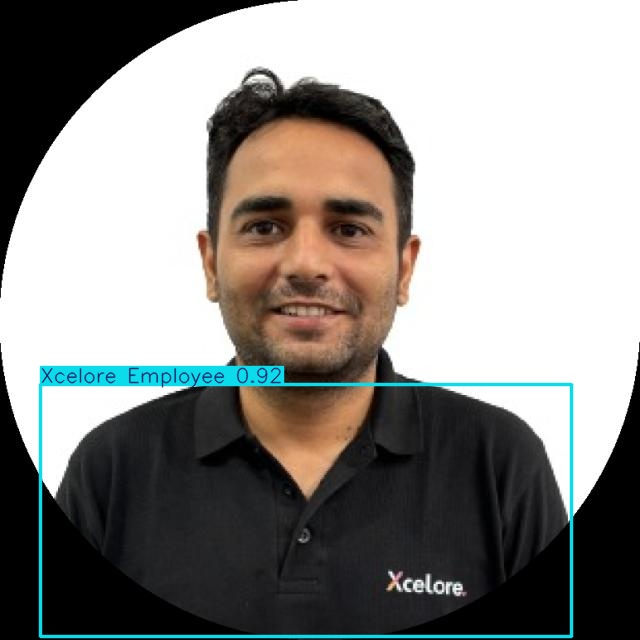

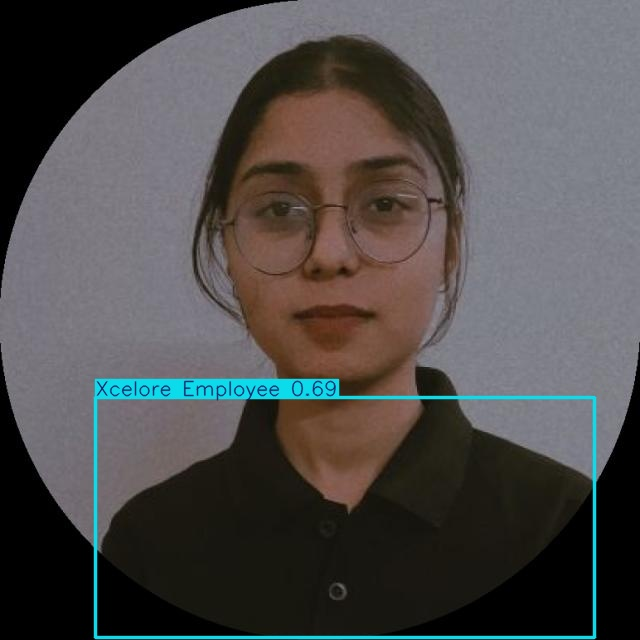

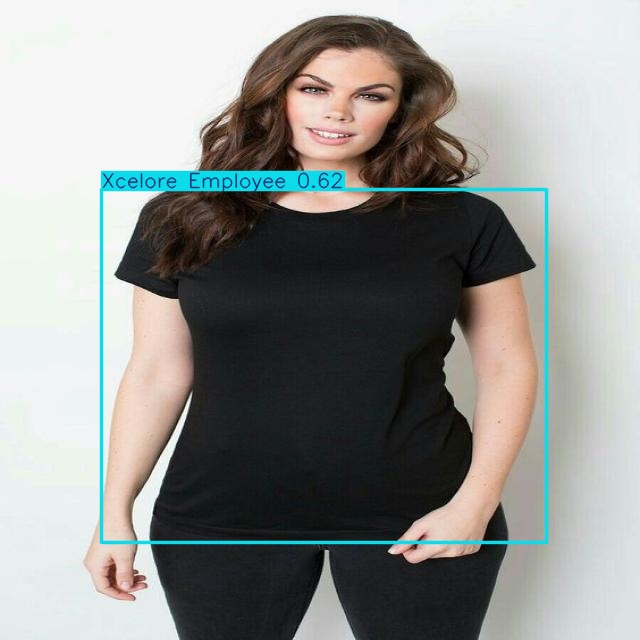

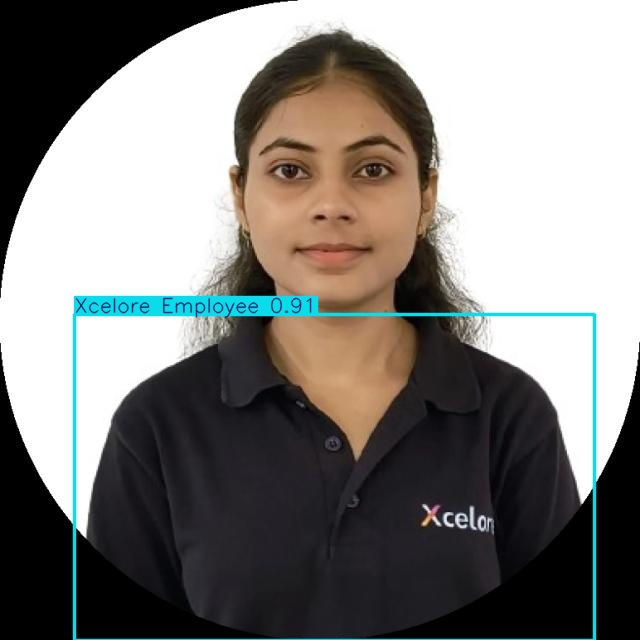

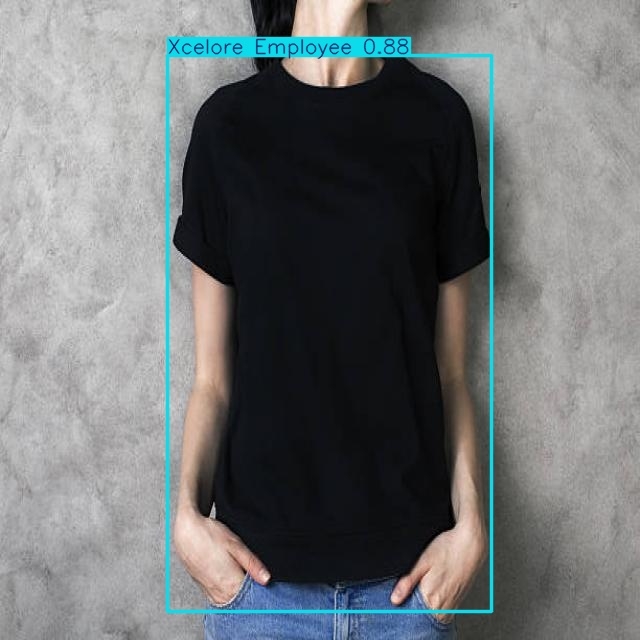

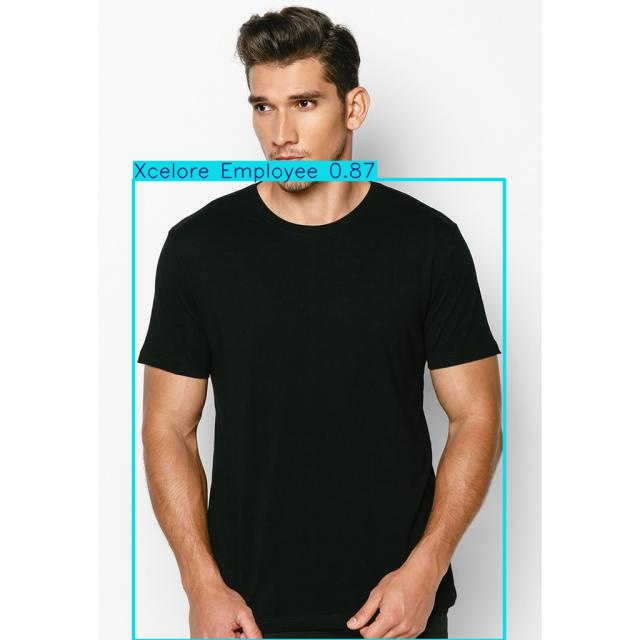

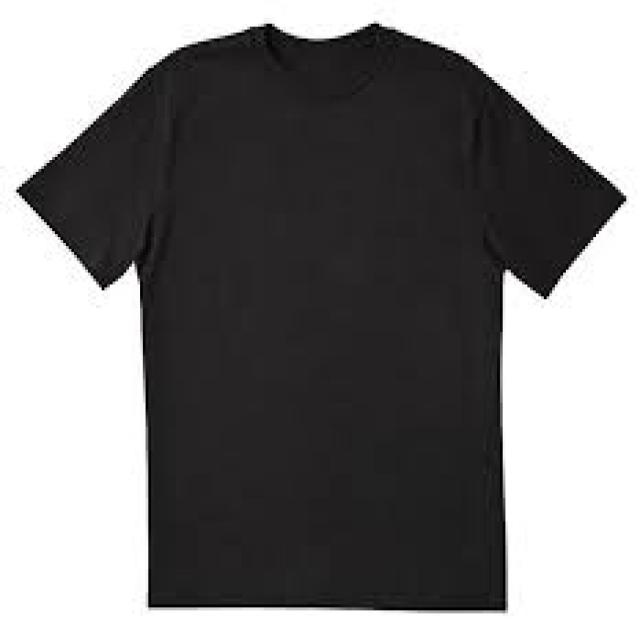

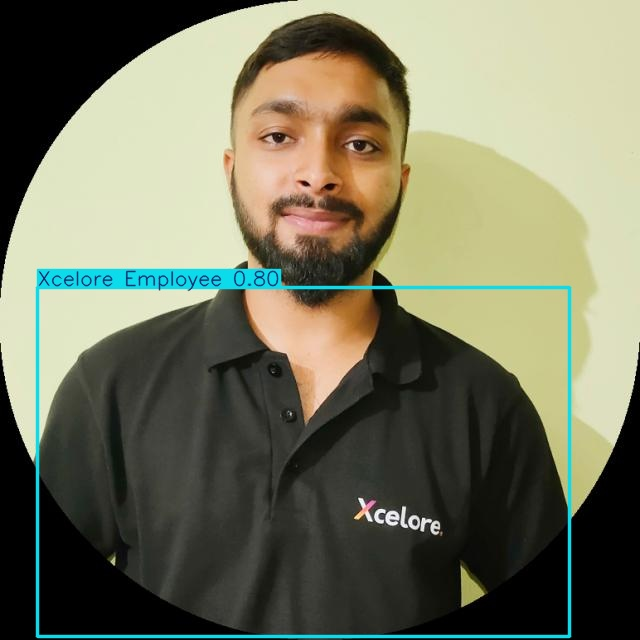

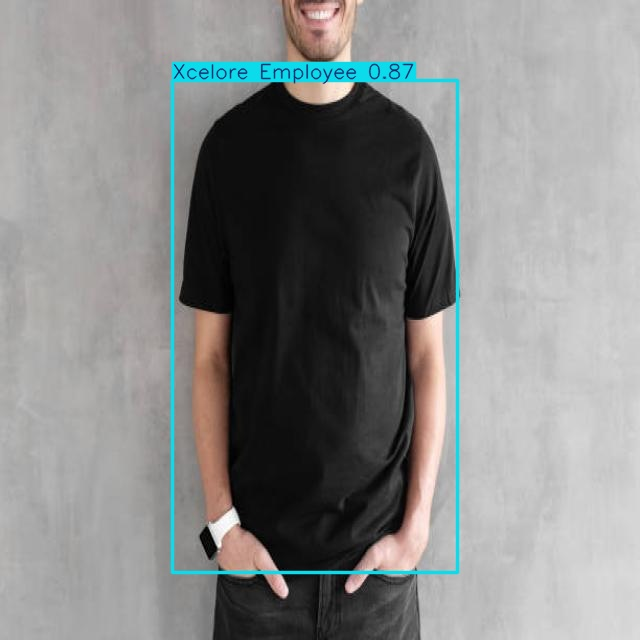

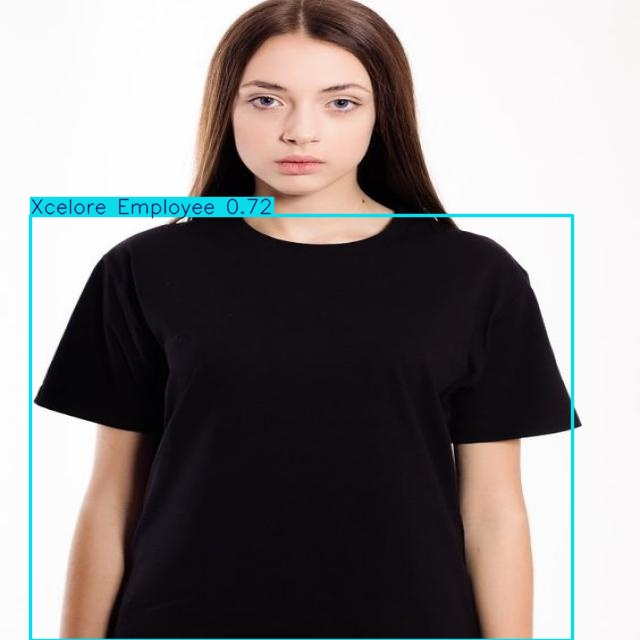

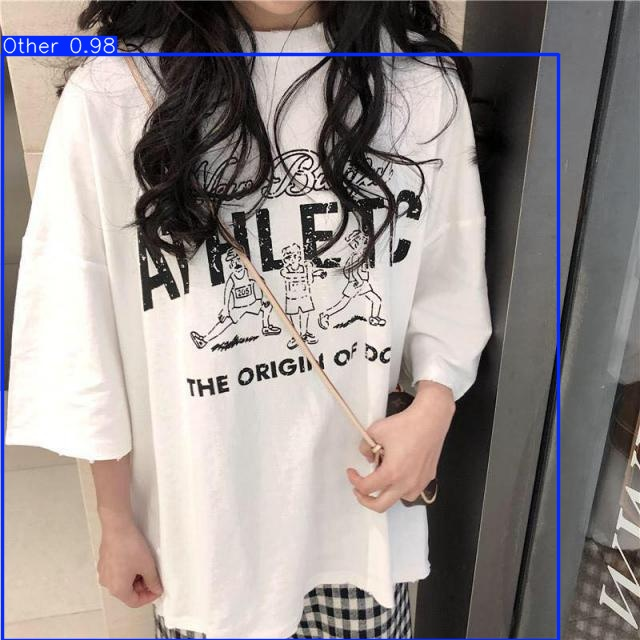

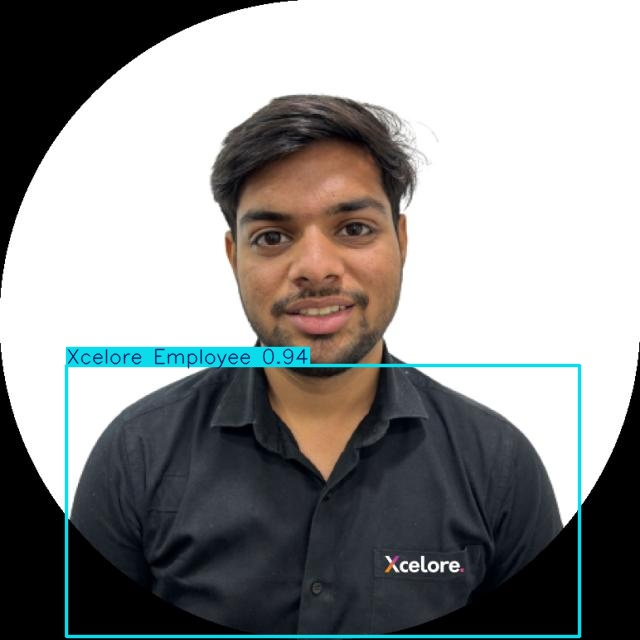

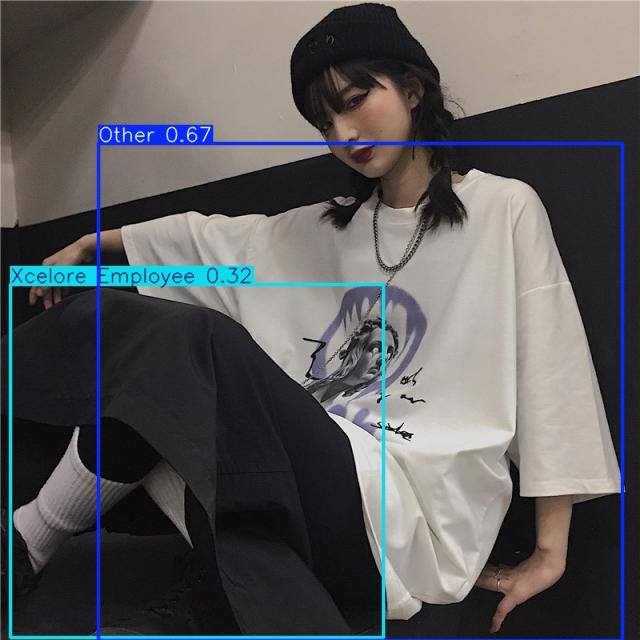

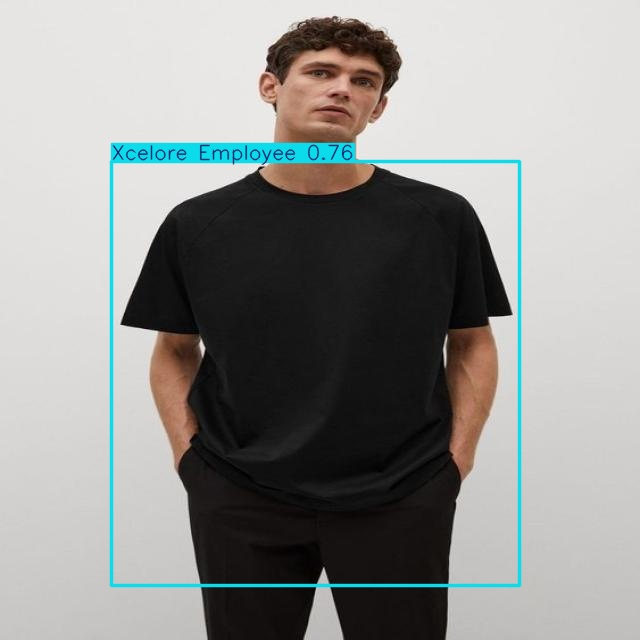

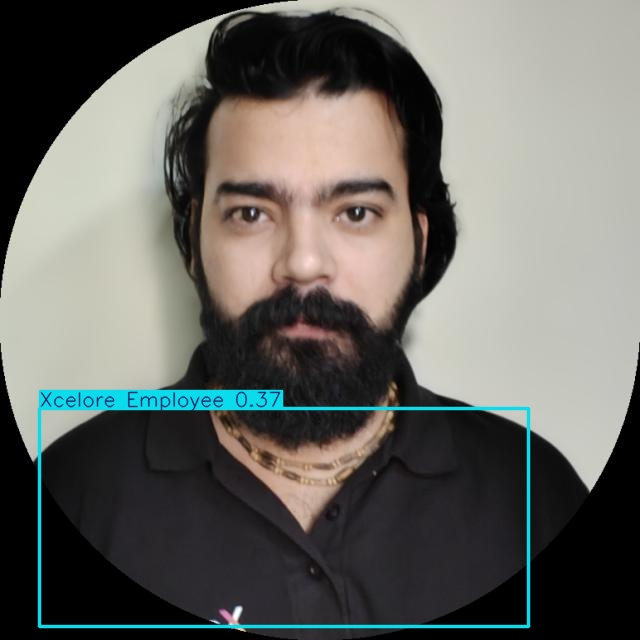

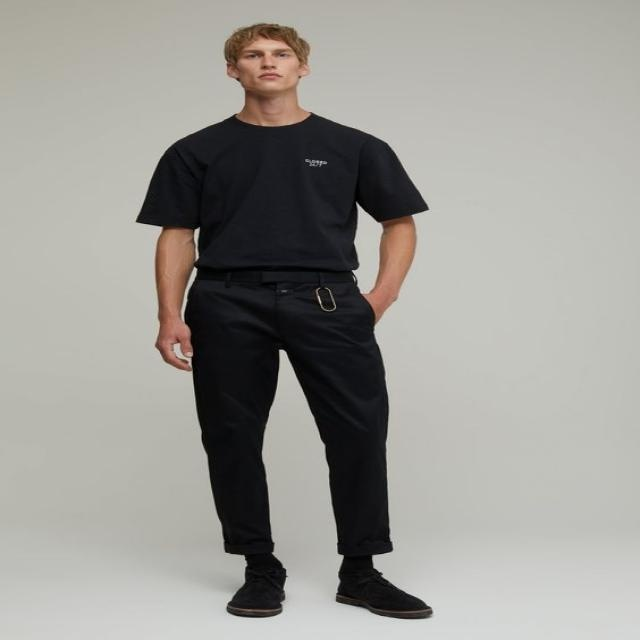

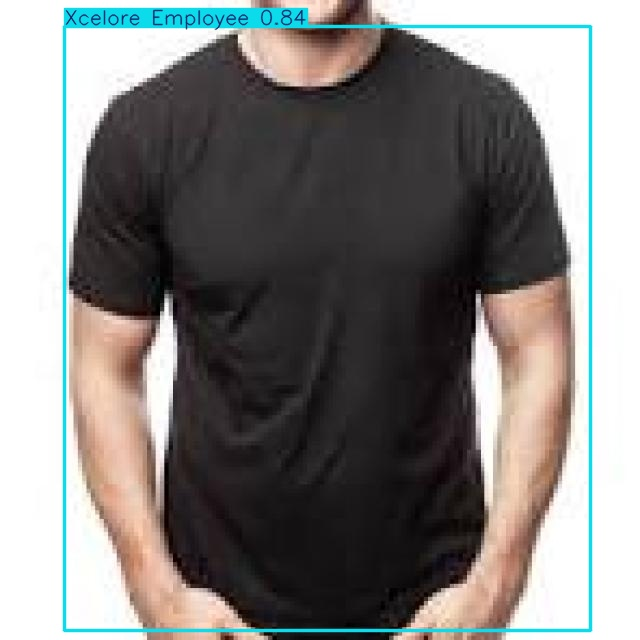

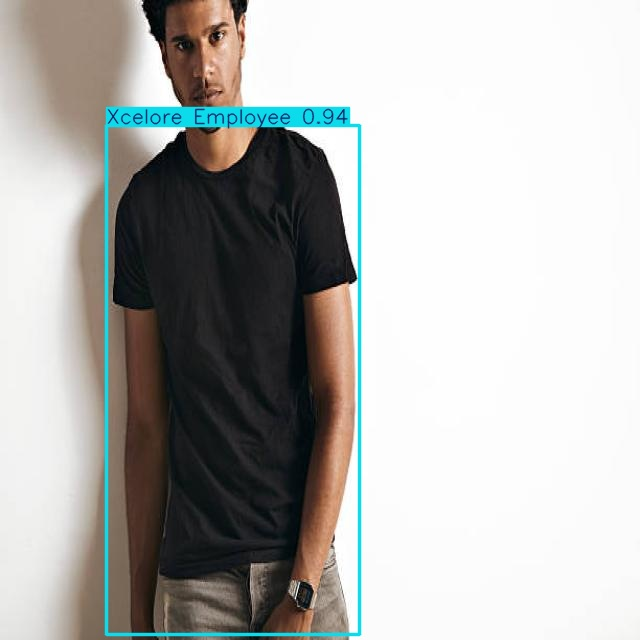

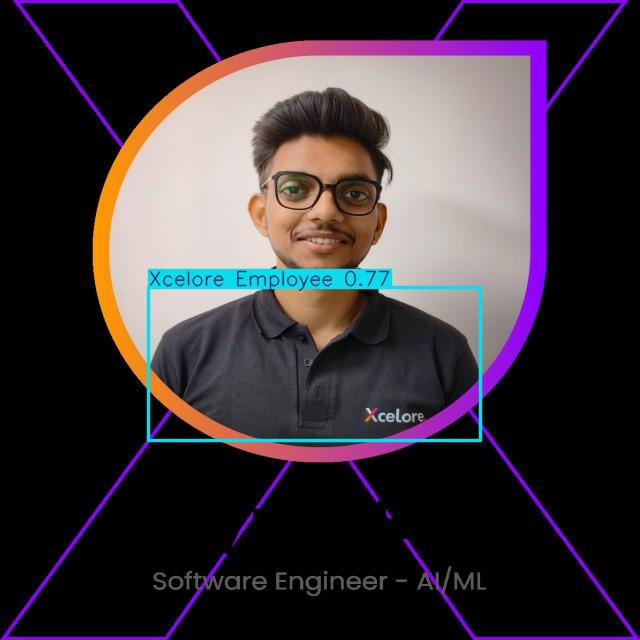

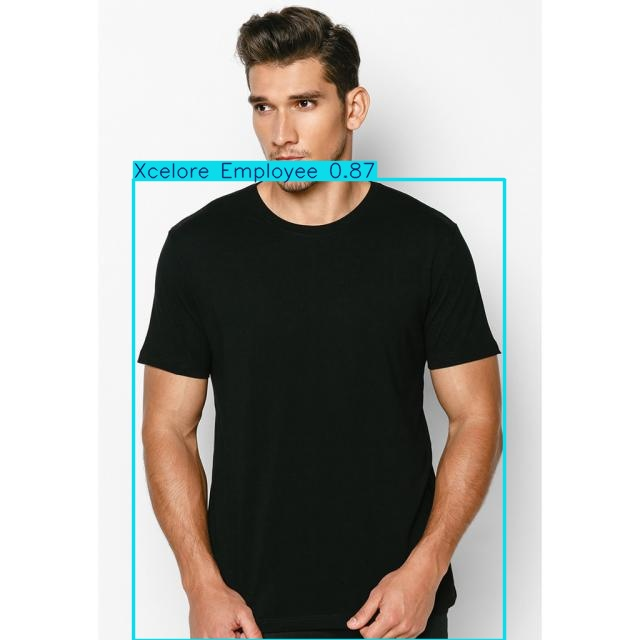

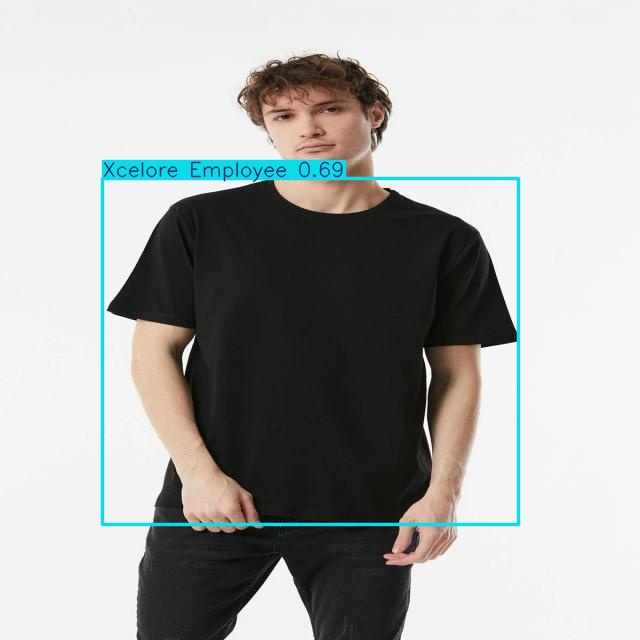

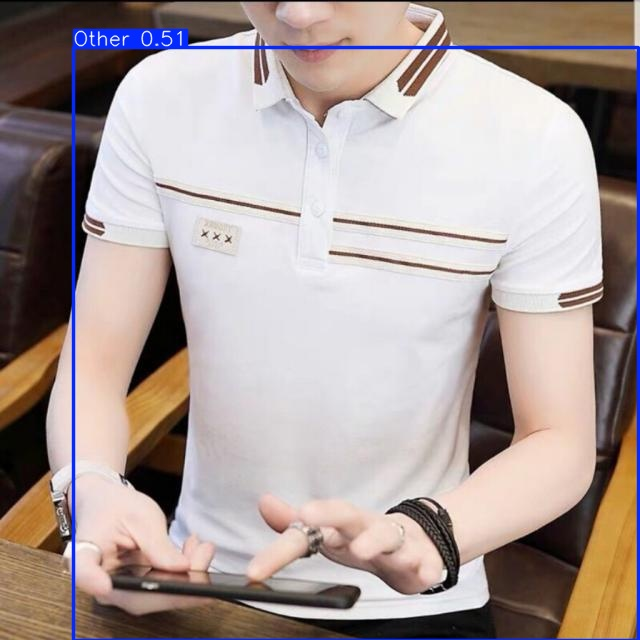

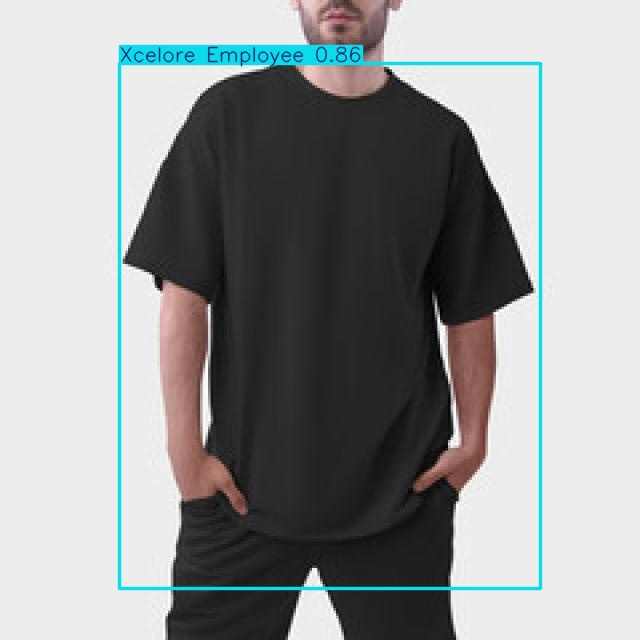

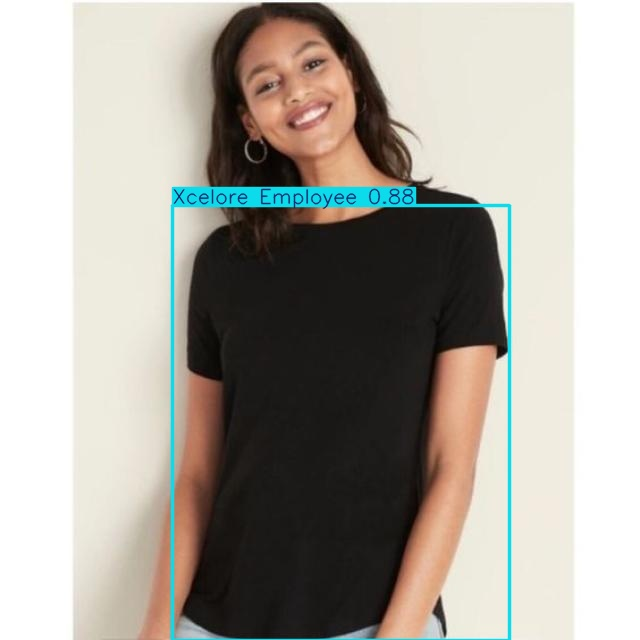

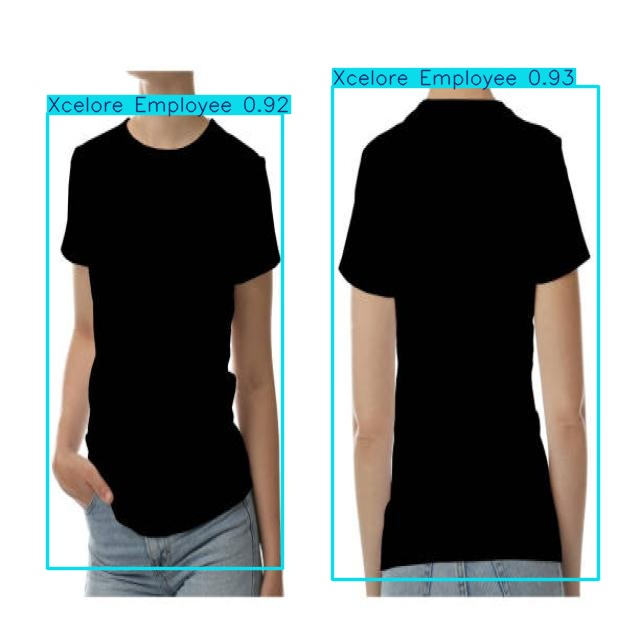

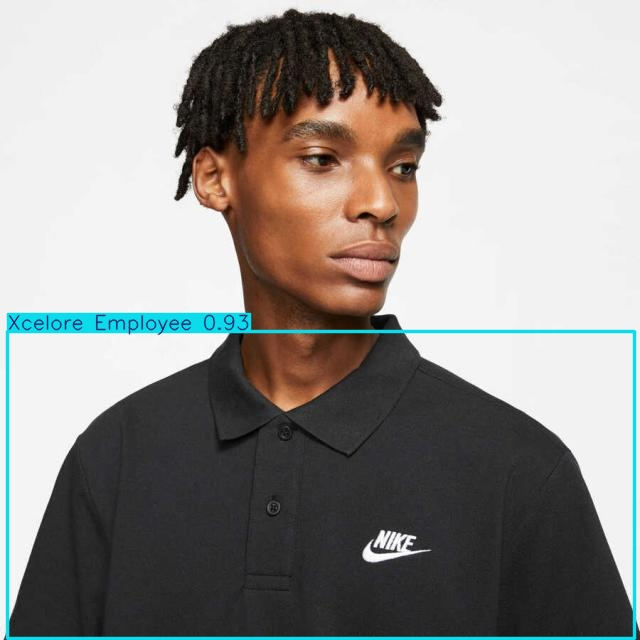

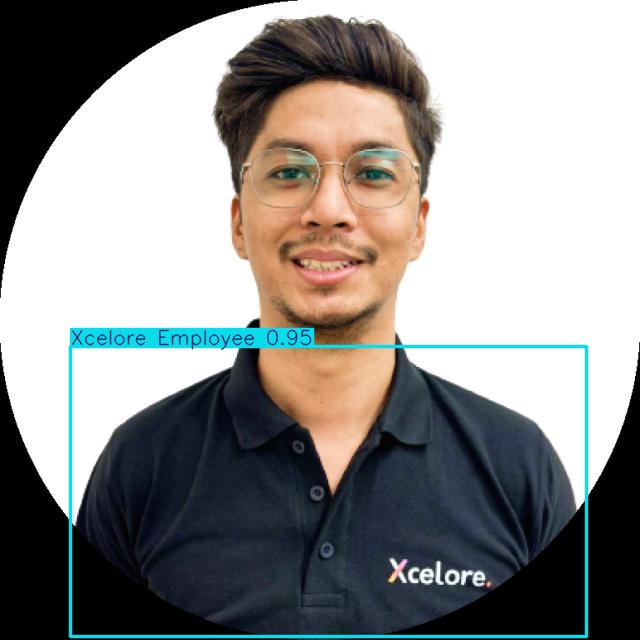

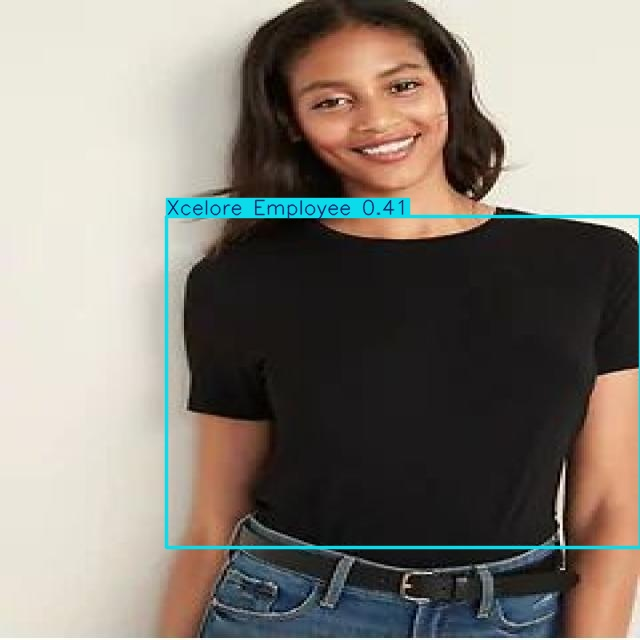

In [ ]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'{os.getcwd()}/runs/detect/predict/*.jpg')[:95]:
  display(Image(filename=image_path,width=600))
  print("\n")